# Identifying Classes and Critical Proteins in Mice Protein Expression

## Setup: 
Importing all the necessary libraries to produce the report.

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

pd.set_option('display.max_columns', None) 

## Read/Import Data:
* The Dataset, **'Data_Cortex_Nuclear.xls'** from <https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression> is read in the form of pandas dataframe using <code>read_excel</code> function.  
* The <code>head</code> function is used to display first **'n'** rows of the dataframe.
* The shape of the dataframe can be obtained using <code>shape</code> function.

In [2]:
protien_data_df = pd.read_excel('Data_Cortex_Nuclear.xls')
protien_data_df.head(n = 5)

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N  \
0  0.177565   2.373744  0.232224  1.750936  0.687906  0.306382  0.402698   
1  0.172817   2.292150  0.226972  1.596377  0.695006  0.299051  0.385987   
2  0.175722   2.283337  0.230247  1.561316  0.677348  0.291276  0.381002   
3  0.176463   2.152301  0.207004  1.595086  0.583277  0.296729  0.377087   
4  0.173627   2.134014  0.192158  1.504230  0.550960  0.286961  0.363502   

     pMEK_N    pNR1_N   pNR2A_N   pNR2B_N  pPKCAB_N    pRSK_N     AKT_N  \
0  0.296927  1.022060  0.605673  1.877684  2.308745  0.441599  0.859366   
1  0.281319  0.956676  0.587559  1.725774  2.043037  0.445222  0.834659   
2  0.281710  1.003635  0.602449  1.731873  2.017984  0.467668  0.814329   
3  0.313832  0.875390  0.520293  1.566852  2.132754  0.477671  0.727705   
4  0.277964  0.864912  0.507990  1.480059  2.013697  0.483416  0.687794   

     BRAF_N  CAMKII_N    CREB_N     ELK_N     ERK_N   GSK3B_N     JNK_N  \
0  0.416289  0.369608  0.178944  1.866358  3.685247  1.537227  0.264526   
1  0.400364  0.356178  0.173680  1.761047  3.485287  1.509249  0.255727   
2  0.399847  0.368089  0.173905  1.765544  3.571456  1.501244  0.259614   
3  0.385639  0.362970  0.179449  1.286277  2.970137  1.419710  0.259536   
4  0.367531  0.355311  0.174836  1.324695  2.896334  1.359876  0.250705   

      MEK_N    TRKA_N     RSK_N     APP_N  Bcatenin_N    SOD1_N    MTOR_N  \
0  0.319677  0.813866  0.165846  0.453910    3.037621  0.369510  0.458539   
1  0.304419  0.780504  0.157194  0.430940    2.921882  0.342279  0.423560   
2  0.311747  0.785154  0.160895  0.423187    2.944136  0.343696  0.425005   
3  0.279218  0.734492  0.162210  0.410615    2.500204  0.344509  0.429211   
4  0.273667  0.702699  0.154827  0.398550    2.456560  0.329126  0.408755   

      P38_N   pMTOR_N   DSCR1_N   AMPKA_N    NR2B_N   pNUMB_N  RAPTOR_N  \
0  0.335336  0.825192  0.576916  0.448099  0.586271  0.394721  0.339571   
1  0.324835  0.761718  0.545097  0.420876  0.545097  0.368255  0.321959   
2  0.324852  0.757031  0.543620  0.404630  0.552994  0.363880  0.313086   
3  0.330121  0.746980  0.546763  0.386860  0.547849  0.366771  0.328492   
4  0.313415  0.691956  0.536860  0.360816  0.512824  0.351551  0.312206   

    TIAM1_N  pP70S6_N    NUMB_N   P70S6_N  pGSK3B_N   pPKCG_N    CDK5_N  \
0  0.482864  0.294170  0.182150  0.842725  0.192608  1.443091  0.294700   
1  0.454519  0.276431  0.182086  0.847615  0.194815  1.439460  0.294060   
2  0.447197  0.256648  0.184388  0.856166  0.200737  1.524364  0.301881   
3  0.442650  0.398534  0.161768  0.760234  0.184169  1.612382  0.296382   
4  0.419095  0.393447  0.160200  0.768113  0.185718  1.645807  0.296829   

       S6_N  ADARB1_N  AcetylH3K9_N    RRP1_N     BAX_N     ARC_N   ERBB4_N  \
0  0.354605  1.339070      0.170119  0.159102  0.188852  0.106305  0.144989   
1  0.354548  1.306323      0.171427  0.158129  0.184570  0.106592  0.150471   
2  0.386087  1.279600      0.185456  0.148696  0.190532  0.108303  0.145330   
3  0.290680  1.198765      0.159799  0.166112  0.185323  0.103184  0.140656   
4  0.309345  1.206995      0.164650  0.160687  0.188221  0.104784  0.141983   

     nNOS_N     Tau_N    GFAP_N   GluR3_N   GluR4_N    IL1B_N   P3525_N  \
0  0.176668  0.125190  0.115291  0.228043  0.142756  0.430957  0.247538   
1  0.178309  0.134275  0.118235  0.238073  0.142037  0.457156  0.257632   
2  0.176213  0.132560  0.117760  0.244817  0.142445  0.510472  0.255343   
3  0.163804  0.123210  0.117439  0.234947  0.145068  0.430996  0

In [3]:
protien_data_df.shape

(1080, 82)

# Data Preparation

### Checking Data Types

* The <code>dtypes</code> function is made use to understand the datatype of the columns in the dataframe.

In [4]:
DataPrep_Data = protien_data_df.copy()

In [5]:
DataPrep_Data.dtypes

MouseID       object
DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
              ...   
CaNA_N       float64
Genotype      object
Treatment     object
Behavior      object
class         object
Length: 82, dtype: object

In [6]:
for col in DataPrep_Data.columns:
    print("column " + col)
    print(DataPrep_Data[col].value_counts())
    print("_________________________________________________________________")

column MouseID
3520_5      1
3488_13     1
3507_7      1
3501_3      1
361_4       1
           ..
50810C_1    1
3499_1      1
3484_11     1
3414_6      1
320_11      1
Name: MouseID, Length: 1080, dtype: int64
_________________________________________________________________
column DYRK1A_N
0.399414    1
0.412268    1
0.487528    1
0.171823    1
0.247678    1
           ..
0.284737    1
0.317157    1
0.332271    1
0.838116    1
0.343750    1
Name: DYRK1A_N, Length: 1077, dtype: int64
_________________________________________________________________
column ITSN1_N
0.639280    2
0.529062    1
0.499294    1
0.554380    1
0.821877    1
           ..
0.477591    1
0.786627    1
0.338680    1
0.549559    1
0.460938    1
Name: ITSN1_N, Length: 1076, dtype: int64
_________________________________________________________________
column BDNF_N
0.265628    1
0.319143    1
0.308158    1
0.331378    1
0.315109    1
           ..
0.279554    1
0.263723    1
0.382093    1
0.432996    1
0.309610    1

In [7]:
for col in DataPrep_Data.columns:
    print("column " + col)
    print(DataPrep_Data[col].unique())
    print("_________________________________________________________________")

column MouseID
['309_1' '309_2' '309_3' ... 'J3295_13' 'J3295_14' 'J3295_15']
_________________________________________________________________
column DYRK1A_N
[0.50364388 0.51461708 0.50918309 ... 0.22869955 0.22124241 0.30262572]
_________________________________________________________________
column ITSN1_N
[0.74719322 0.68906355 0.7302468  ... 0.39517937 0.41289438 0.46105919]
_________________________________________________________________
column BDNF_N
[0.4301753  0.41177034 0.41830878 ... 0.23411809 0.24397413 0.25656431]
_________________________________________________________________
column NR1_N
[2.81632854 2.78951404 2.68720107 ... 1.73318386 1.87634725 2.09279039]
_________________________________________________________________
column NR2A_N
[5.99015166 5.68503786 5.62205854 ... 2.22085202 2.38408779 2.59434802]
_________________________________________________________________
column pAKT_N
[0.21883002 0.21163615 0.2090109  ... 0.22066517 0.20889673 0.25100133]
________

### Descriptive statistics 

* Descriptive statistics can be helpful in performing sanity checks(.....such as extreme large values or negative values). The <code>describe</code> function is used here for the purpose.

In [8]:
DataPrep_Data.describe(include = np.number).round(3)

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
count  1077.000  1077.000  1077.000  1077.000  1077.000  1077.000  1077.000   
mean      0.426     0.617     0.319     2.297     3.844     0.233     0.182   
std       0.249     0.252     0.049     0.347     0.933     0.042     0.027   
min       0.145     0.245     0.115     1.331     1.738     0.063     0.064   
25%       0.288     0.473     0.287     2.057     3.156     0.206     0.165   
50%       0.366     0.566     0.317     2.297     3.761     0.231     0.182   
75%       0.488     0.698     0.348     2.528     4.440     0.257     0.197   
max       2.516     2.603     0.497     3.758     8.483     0.539     0.317   

       pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N    pMEK_N  \
count   1077.000  1077.000  1077.000  1077.000  1077.000  1077.000  1077.000   
mean       3.537     0.213     1.429     0.546     0.314     0.318     0.275   
std        1.295     0.033     0.467     0.345     0.052     0.052     0.046   
min        1.344     0.113     0.429     0.149     0.052     0.191     0.057   
25%        2.480     0.191     1.204     0.337     0.281     0.282     0.244   
50%        3.327     0.211     1.356     0.444     0.321     0.313     0.277   
75%        4.482     0.235     1.561     0.663     0.349     0.352     0.303   
max        7.464     0.306     6.113     3.567     0.493     0.474     0.458   

         pNR1_N   pNR2A_N   pNR2B_N  pPKCAB_N    pRSK_N     AKT_N    BRAF_N  \
count  1077.000  1077.000  1077.000  1077.000  1077.000  1077.000  1077.000   
mean      0.826     0.727     1.562     1.525     0.443     0.682     0.379   
std       0.118     0.188     0.271     0.482     0.067     0.127     0.216   
min       0.500     0.281     0.302     0.568     0.096     0.064     0.144   
25%       0.743     0.590     1.381     1.168     0.404     0.597     0.264   
50%       0.821     0.720     1.564     1.366     0.441     0.682     0.327   
75%       0.898     0.849     1.749     1.886     0.482     0.760     0.414   
max       1.408     1.413     2.724     3.061     0.651     1.182     2.133   

       CAMKII_N    CREB_N     ELK_N     ERK_N   GSK3B_N     JNK_N     MEK_N  \
count  1077.000  1077.000  1062.000  1077.000  1077.000  1077.000  1073.000   
mean      0.363     0.180     1.173     2.474     1.173     0.242     0.273   
std       0.052     0.026     0.336     0.653     0.245     0.034     0.041   
min       0.213     0.114     0.498     1.132     0.151     0.046     0.147   
25%       0.331     0.162     0.944     1.992     1.023     0.220     0.247   
50%       0.360     0.180     1.096     2.401     1.160     0.245     0.273   
75%       0.394     0.196     1.324     2.873     1.310     0.263     0.301   
max       0.586     0.320     2.803     5.198     2.476     0.387     0.415   

         TRKA_N     RSK_N     APP_N  Bcatenin_N    SOD1_N    MTOR_N     P38_N  \
count  1077.000  1077.000  1077.000    1062.000  1077.000  1077.000  1077.000   
mean      0.693     0.168     0.405       2.147     0.543     0.452     0.415   
std       0.121     0.028     0.061       0.436     0.281     0.065     0.089   
min       0.199     0.107     0.236       1.135     0.217     0.201     0.228   
25%       0.617     0.150     0.366       1.827     0.320     0.410     0.352   
50%       0.705     0.167     0.402       2.115     0.444     0.452     0.408   
75%       0.774     0.185     0.442       2.424     0.696     0.488     0.466   
max       1.002     0.305     0.633       3.681     1.873     0.677     0.933   

        pMTOR_N   DSCR1_N   AMPKA_N    NR2B_N   pNUMB_N  RAPTOR_N   TIAM1_N  \
count  1077.000  1077.000  1077.000  1077.000  1077.000  1077.000  1077.000   
mean      0.759     0.585     0.368     0.565     0.357     0.316     0.419   
std       0.122     0.101     0.063     0.088     0.063     0.054     0.067   
min       0.167     0.155     0.226     0.185     0.186     0.195     0.238   
25%       0.684     0.531

In [9]:
DataPrep_Data.describe(include = np.object).round(3)

MouseID Genotype  Treatment Behavior   class
count     1080     1080       1080     1080    1080
unique    1080        2          2        2       8
top     3520_5  Control  Memantine      S/C  c-CS-m
freq         1      570        570      555     150

### Dropping ID like columns

* The features with ID information (....such as studentID or UserID) are not informative and cannot be used in modelling. In this Dataset, <code>MouseID</code> is dropped.

In [10]:
DataPrep_Data = DataPrep_Data.drop(columns = 'MouseID')
DataPrep_Data.shape

(1080, 81)

### Removing Typos, Extra-WhiteSpaces

* There are __"NO"__ typos and extra-whitespaces in the dataset.

### Missing the values

* The next step is to eliminate the missing values. The number of missing values can be obtained by __'isna().sum()'__ function.
* There are many null values in the dataframe. To deal with these, the mice will receive the mean value of their other mice in the same class. This is better approach rather than eliminating the entire mouse from the data, or by using the mean of all of the mice which have very different genetic and environmental factors in their development.

In [11]:
DataPrep_Data.isna().sum()

DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
NR2A_N       3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 81, dtype: int64

In [12]:
class_value = 'class'
mean_values = DataPrep_Data.groupby(by=['class']).mean().reset_index()

def fix_null_values(row, col):
    value = row[col]
    if pd.isnull(value):
        return mean_values.loc[mean_values[class_value] == row[class_value], col], True
    return value, False

for i, row in DataPrep_Data.iterrows():
    for col in DataPrep_Data.columns:
        row[col], fixed = fix_null_values(row, col)
    DataPrep_Data.iloc[i] = row

In [13]:
DataPrep_Data.isna().sum()

DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
NR2A_N       0
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 81, dtype: int64

### Detecting and Handling Outliers

* An outlier is a data point that differs significantly from other observations. The <code>Box Plot</code> is plotted to check if any outliers exist.

In [14]:
num_cols = DataPrep_Data.select_dtypes(include=['float64' , 'int64']).columns.tolist()
fig = plt.figure(figsize=[40,220])
for col,num in zip(num_cols, range(1,78)):
    ax = fig.add_subplot(22,4,num)
    sns.boxplot(DataPrep_Data[col], orient='v', color="#c72c41")
    ax.set_title("Boxplot of\n" +col, fontsize = 15)
    ax.set_ylabel('')
plt.show()

* It is clear from the graphs that there are many outliers in almost all the features.
* The outliers are not removed, because there is a probability that few or many mice can behave extremely different to some proteins. The accuracy of the prediction is utmost important hence all the observations are considered to take the all the mice data into account.

### Sanity Check

* From the descriptive statistics is observed that there exists a negative value in <code>RRP1_N</code>. This was replaced with mean value of <code>RRP1_N</code> feature.

In [15]:
min(DataPrep_Data['RRP1_N'])

-0.062007874

In [16]:
DataPrep_Data.loc[DataPrep_Data["RRP1_N"] == min(DataPrep_Data['RRP1_N']),"RRP1_N"] = DataPrep_Data["RRP1_N"].mean()

In [17]:
min(DataPrep_Data['RRP1_N'])

0.116899744

# Data Exploring

In [18]:
DataExpl_Data = DataPrep_Data.copy()

## Univariate Visualizations

### Exploring <code>Class</code> feature.

__Figure 1__ : Visualises the number of mice in each of the classes. It is clear that the dataset considered has almost equal number of mice in almost all the classes. The class “t-CS-s” has a smaller number of mice comparatively but this does not mean analysis to suffer from class imbalance as the difference is less.

Text(0, 0.5, 'Count of Mice')

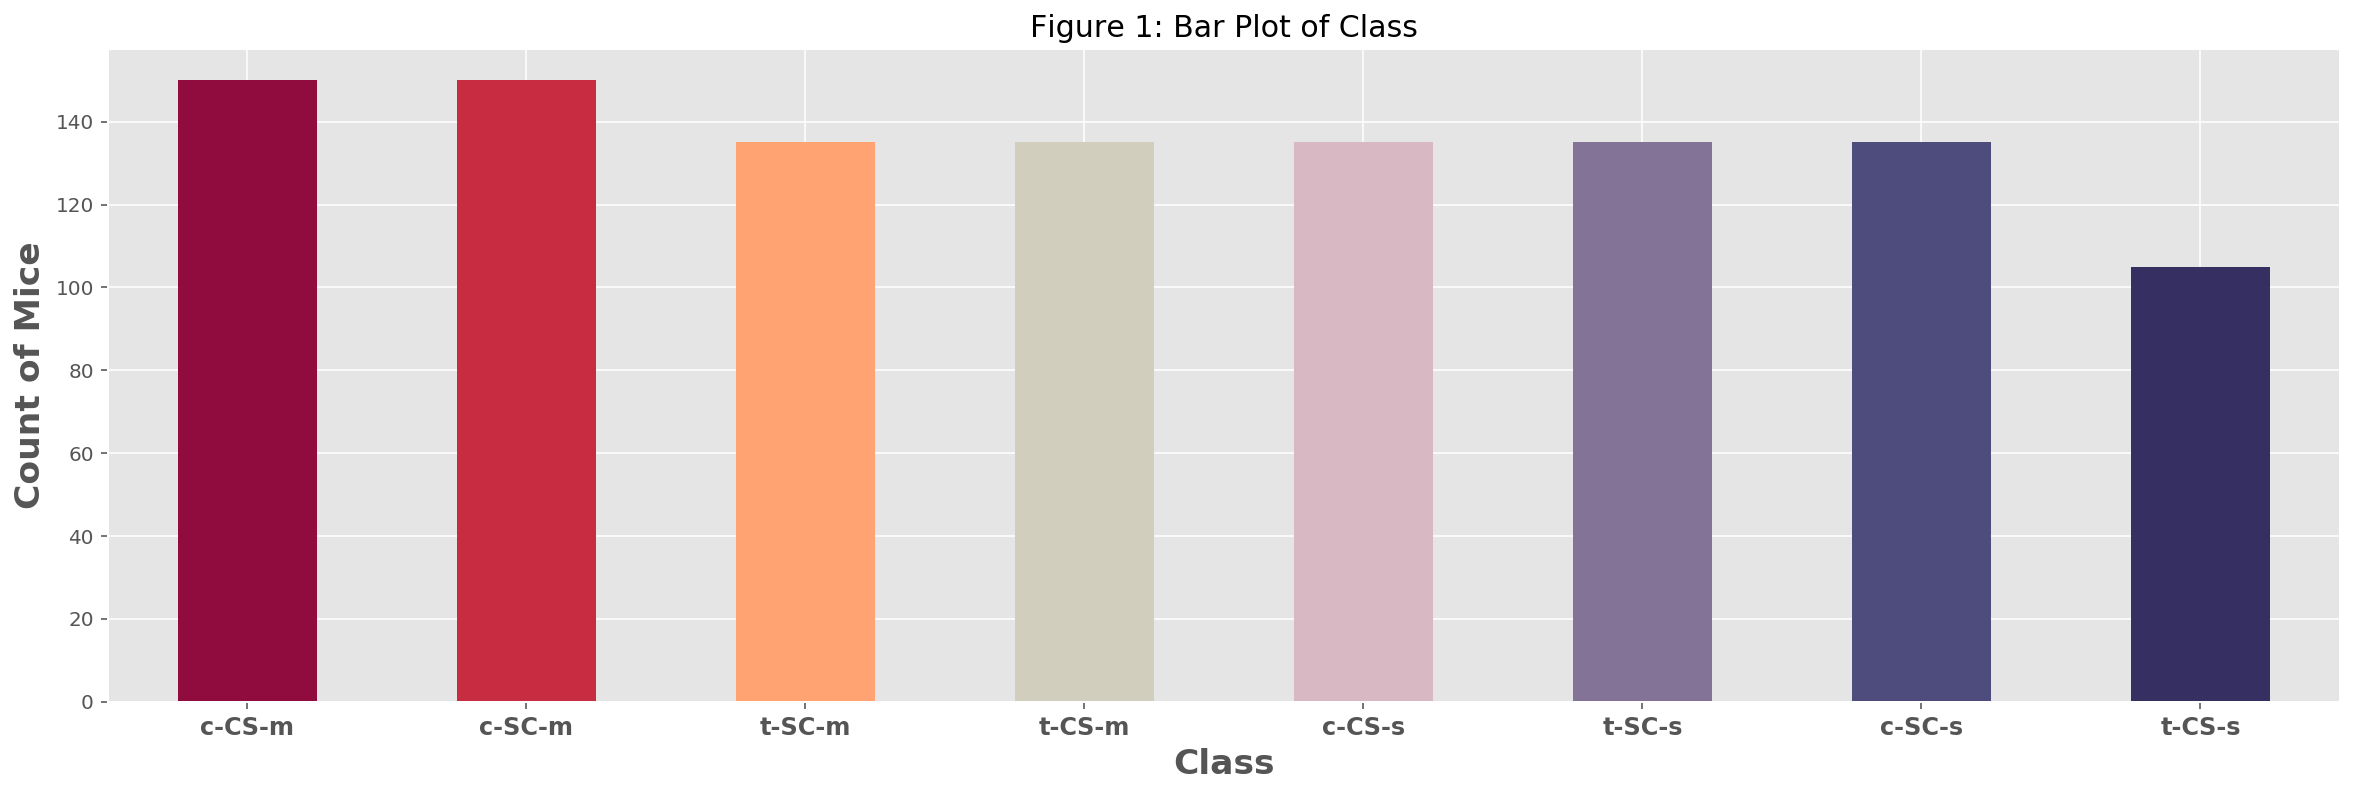

In [19]:
plt.figure(figsize=(20,6))
plot = DataExpl_Data['class'].value_counts().plot(kind = 'bar',
                    color= ("#900c3f","#c72c41","#ffa372","#d1cebd","#d8b9c3","#827397","#4d4c7d","#363062"))
plt.title('Figure 1: Bar Plot of Class', fontsize = 15)
plt.xlabel('Class', rotation='0',fontsize='xx-large',fontweight='bold')
plt.xticks(rotation = '0',fontsize='large',fontweight='bold')
plt.ylabel('Count of Mice', fontsize='xx-large',fontweight='bold')

### Exploring <code>Bcatenin_N</code> feature.

__Figure 2__ : Distribution shows that <code>Bcatenin_N</code> is normally distributed.

Text(0.5, 0, 'Protein Bcatenin_N')

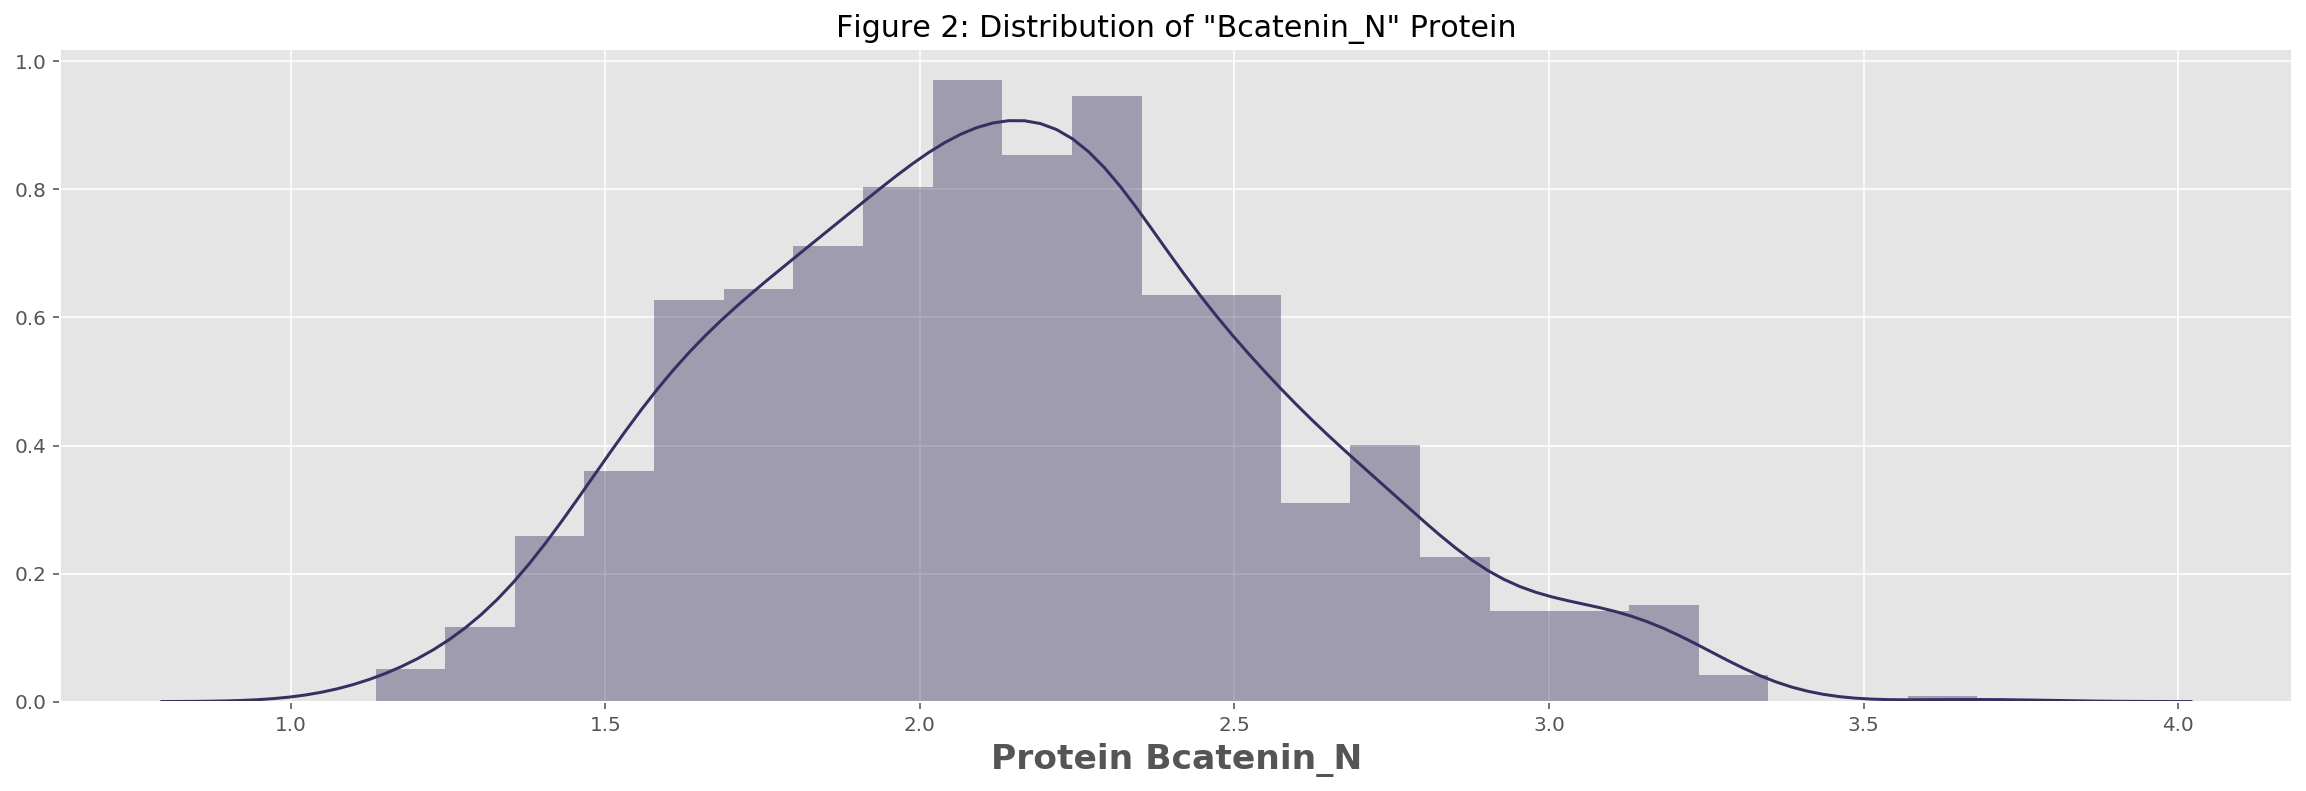

In [20]:
plt.figure(figsize=(20,6))
plot = sns.distplot(DataExpl_Data['Bcatenin_N'],
                    color='#363062').set_title('Figure 2: Distribution of "Bcatenin_N" Protein', fontsize=15)
plt.xlabel('Protein Bcatenin_N', rotation='0',fontsize='xx-large',fontweight='bold')

### Exploring <code>pPKCAB_N</code> feature.

__Figure 3__ : shows that not only distribution of <code>pPKCAB_N</code> is right skewed but a large number of mice fall in the range of 1.3 to 1.9.

Text(0.5, 0, 'Protein pPKCAB_N')

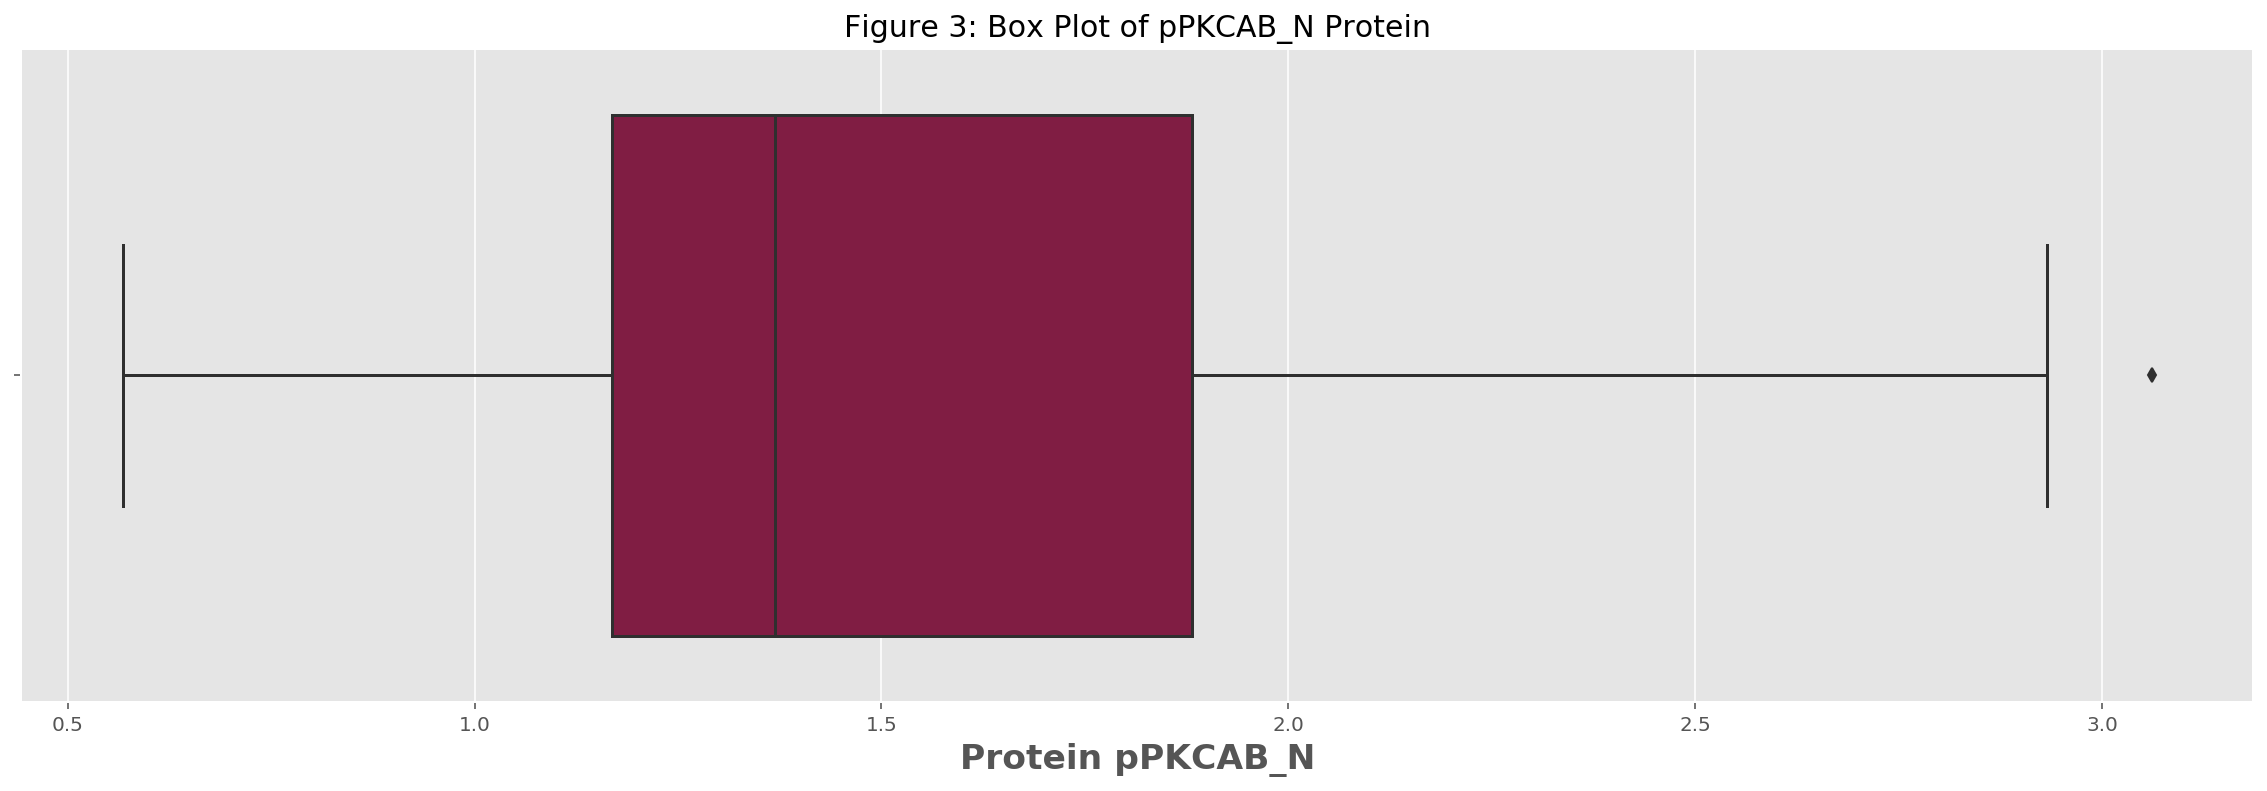

In [21]:
plt.figure(figsize=(20,6))
plot = sns.boxplot(DataExpl_Data['pPKCAB_N'],
                   color='#900c3f').set_title('Figure 3: Box Plot of pPKCAB_N Protein', fontsize=15)
plt.xlabel('Protein pPKCAB_N', rotation='0',fontsize='xx-large',fontweight='bold')

### Exploring <code>Ubiquitin_N</code> feature.

__Figure 4__ : The scatter plot shows that <code>Ubiquitin_N</code> has no correlation with the mice.

Text(0.5, 0, 'Observation')

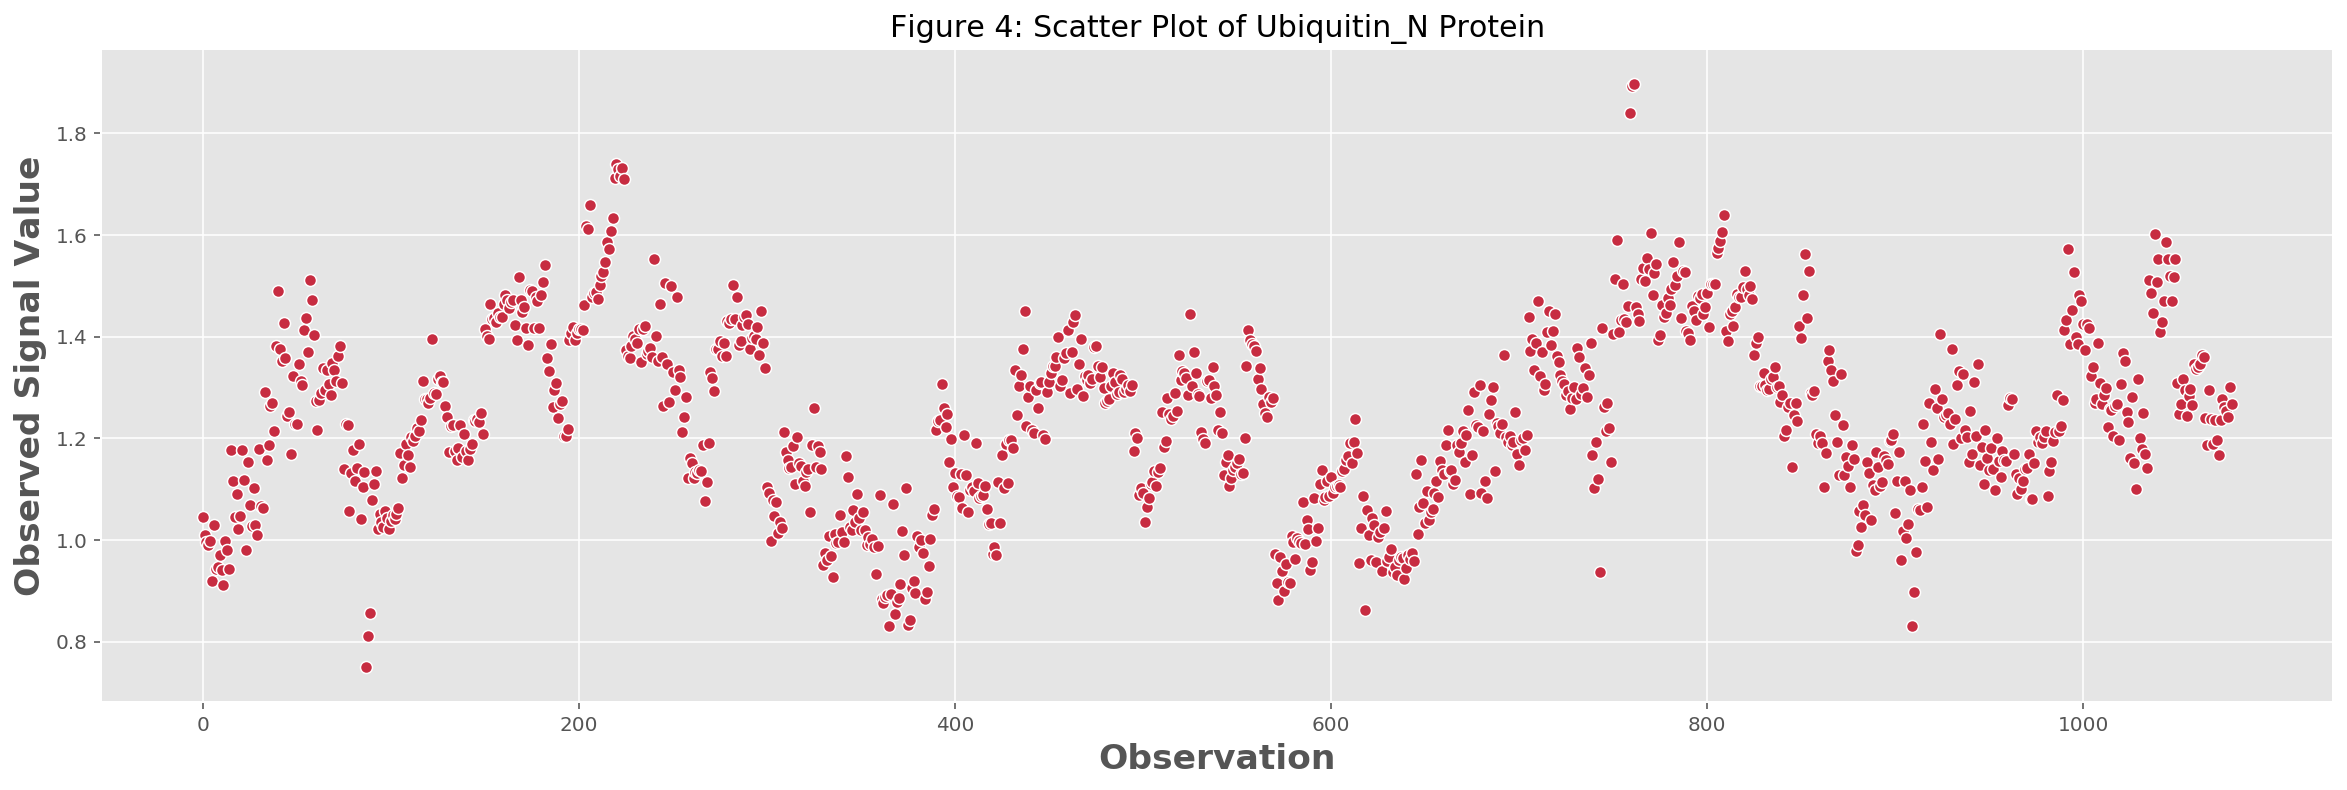

In [22]:
plt.figure(figsize=(20,6))
plot = sns.scatterplot(data=DataExpl_Data['Ubiquitin_N'],
                color='#c72c41').set_title('Figure 4: Scatter Plot of Ubiquitin_N Protein',fontsize=15)
plt.ylabel('Observed Signal Value',fontsize='xx-large',fontweight='bold')
plt.xlabel('Observation', rotation='0',fontsize='xx-large',fontweight='bold')

### Exploring <code>pCAMKII_N</code> feature.

__Figure 5__ : depicts that no mice behaved abnormally to <code>pCAMKII_N</code>. Since there are no outliers.

Text(0.5, 0, 'Protein pCAMKII_N')

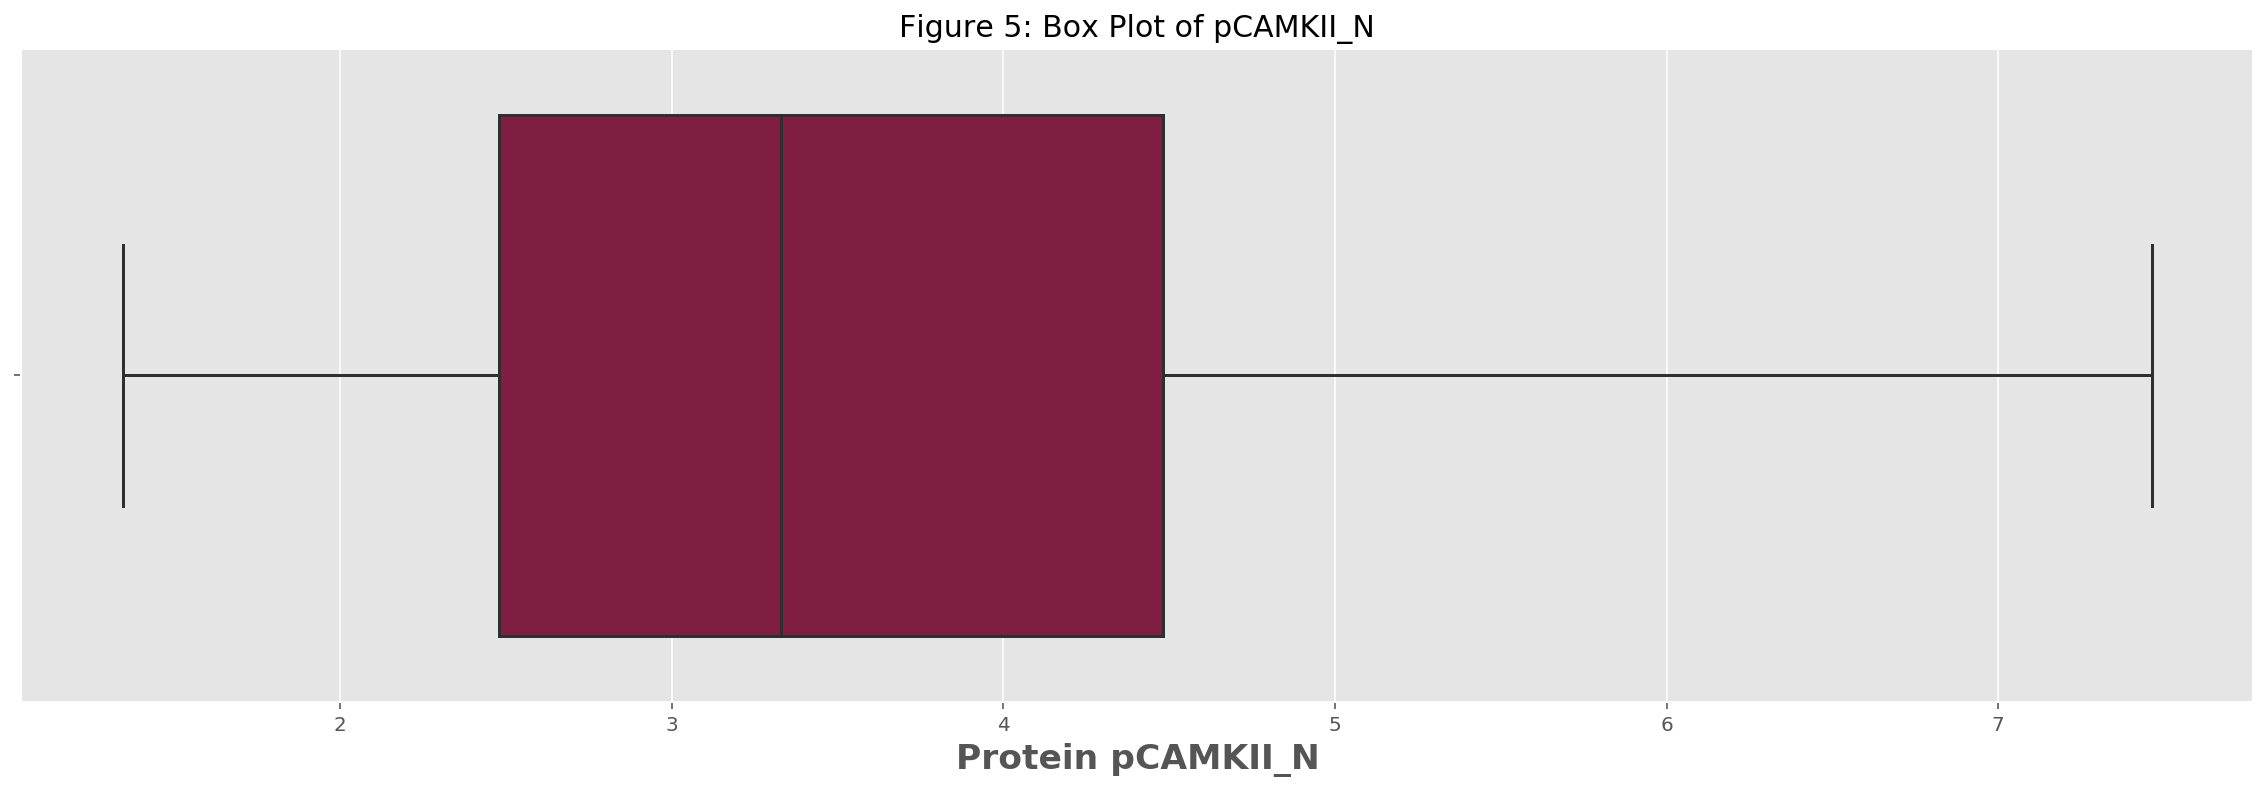

In [23]:
plt.figure(figsize=(20,6))
plot = sns.boxplot(DataExpl_Data['pCAMKII_N'],
                   color='#900c3f').set_title('Figure 5: Box Plot of pCAMKII_N',fontsize=15)
plt.xlabel('Protein pCAMKII_N', rotation='0',fontsize='xx-large',fontweight='bold')

### Exploring <code>pNR2B_N</code> feature.

__Figure 6__ : clearly gives information that apart from two outliers, all the mice showed same expression towards <code>pNR2B_N</code> protein.
    

Text(0.5, 0, 'Observation')

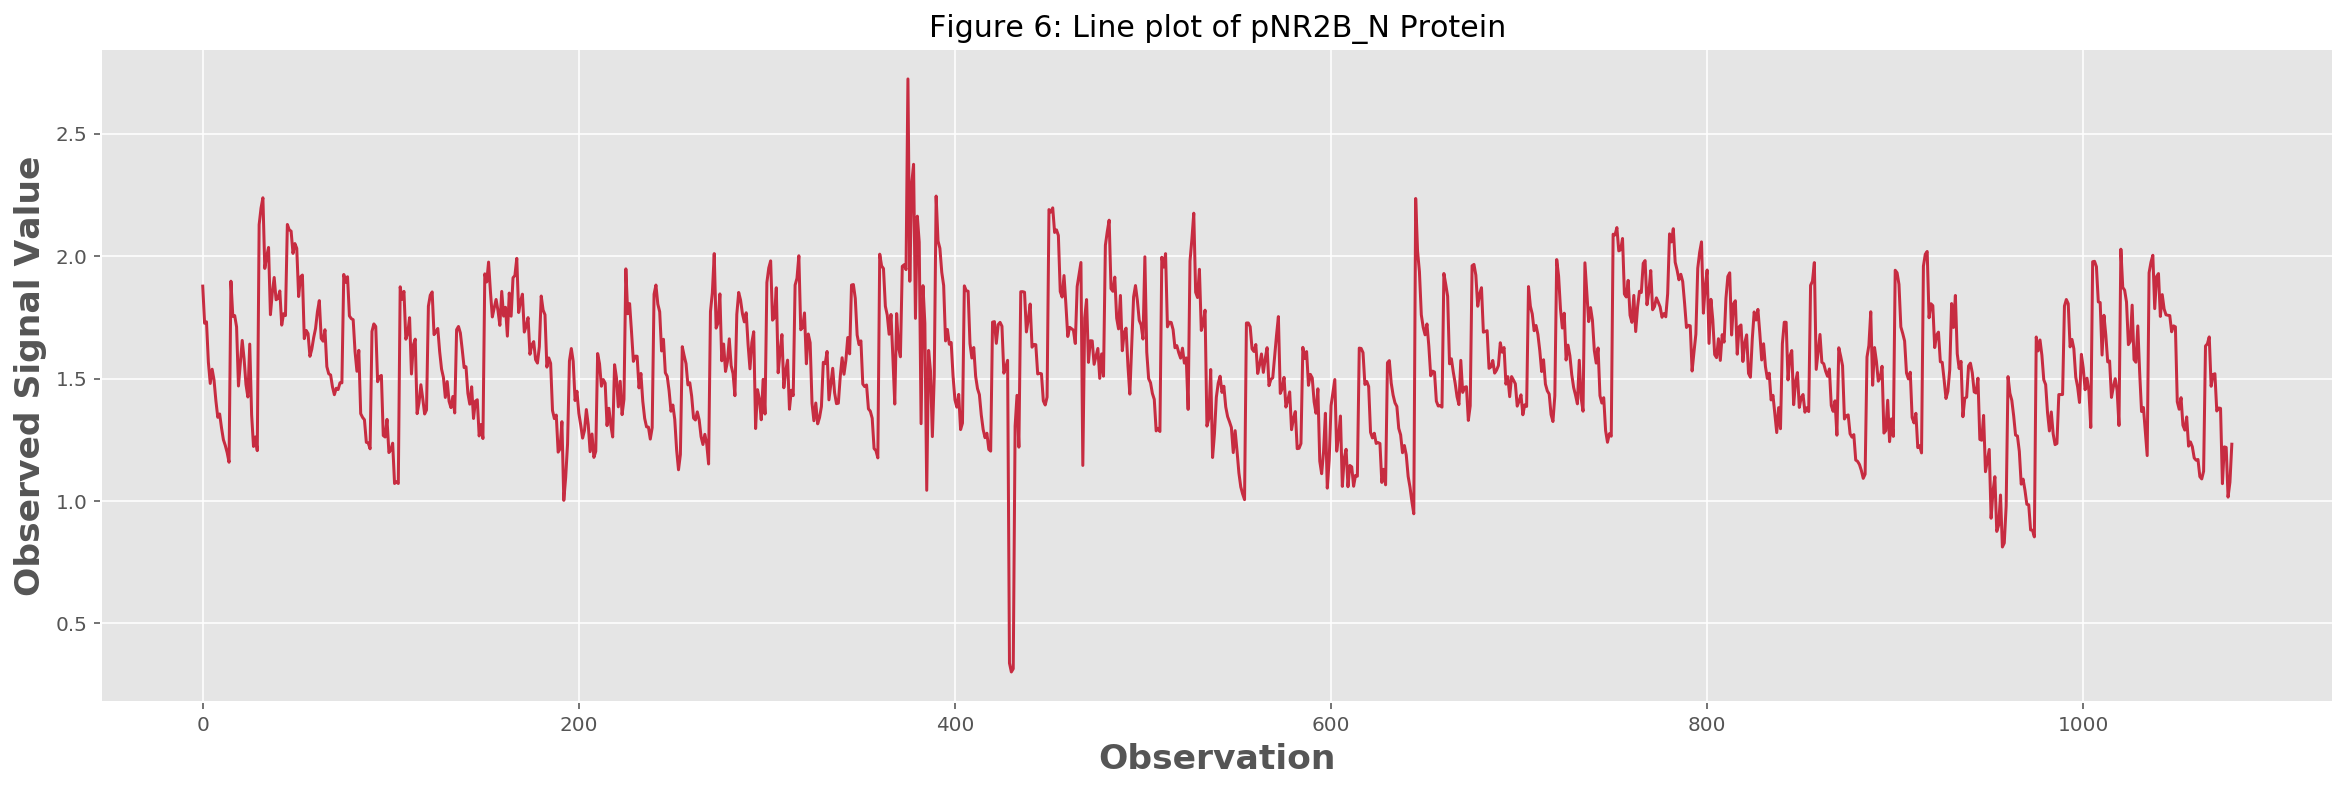

In [24]:
plt.figure(figsize=(20,6))
plot = plt.plot(DataExpl_Data['pNR2B_N'],color='#c72c41')
plt.title('Figure 6: Line plot of pNR2B_N Protein',fontsize=15)
plt.ylabel('Observed Signal Value',fontsize='xx-large',fontweight='bold')
plt.xlabel('Observation', rotation='0',fontsize='xx-large',fontweight='bold')

### Exploring <code>AKT_N</code> feature.

__Figure 7__ : shows the distribution of <code>AKT_N</code> Protein. It is slightly skewed towards left.
                                               

Text(0.5, 0, 'Protein AKT_N')

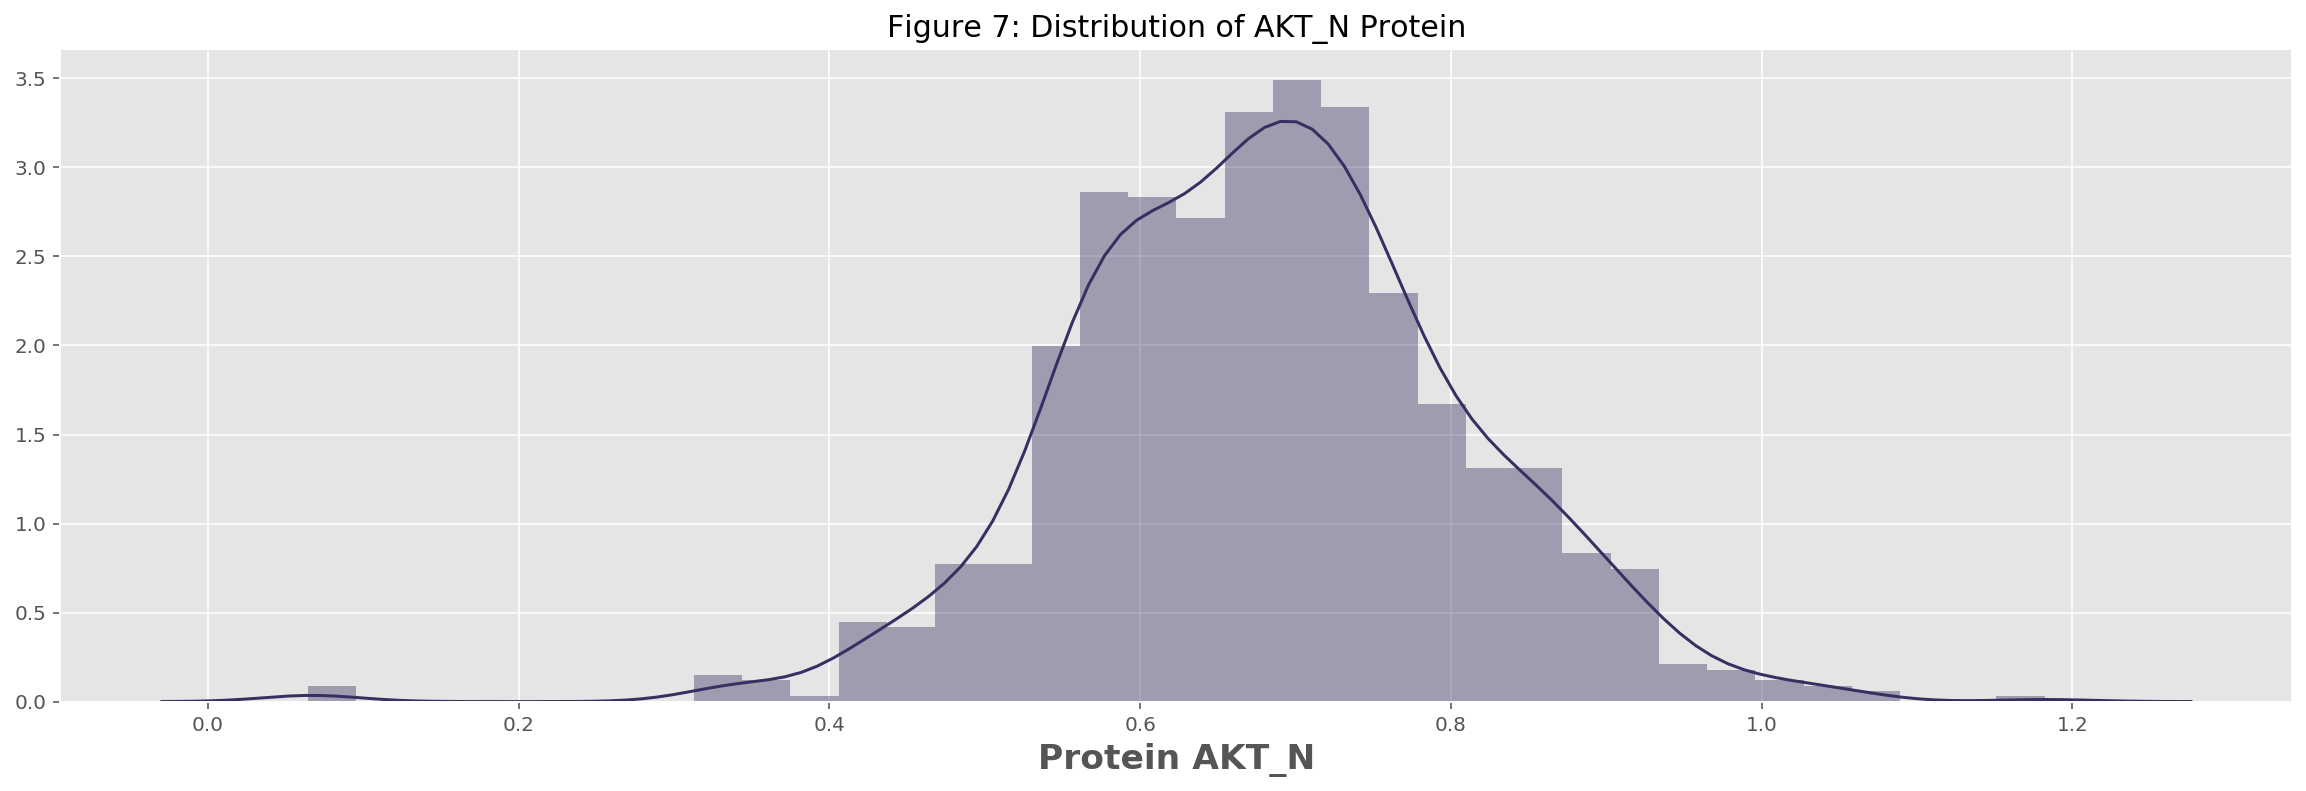

In [25]:
plt.figure(figsize=(20,6))
plot = sns.distplot(DataExpl_Data['AKT_N'],
             kde=True,color='#363062').set_title('Figure 7: Distribution of AKT_N Protein', fontsize=15)
plt.xlabel('Protein AKT_N', rotation='0',fontsize='xx-large',fontweight='bold')

### Exploring <code>NR1_N</code> feature.

__Figure 8__ : shows that majority of mice fell in the bracket of 1.5 to 3.0 for  <code>NR1_N</code> Protein.
                                               

Text(0.5, 0, 'Observation')

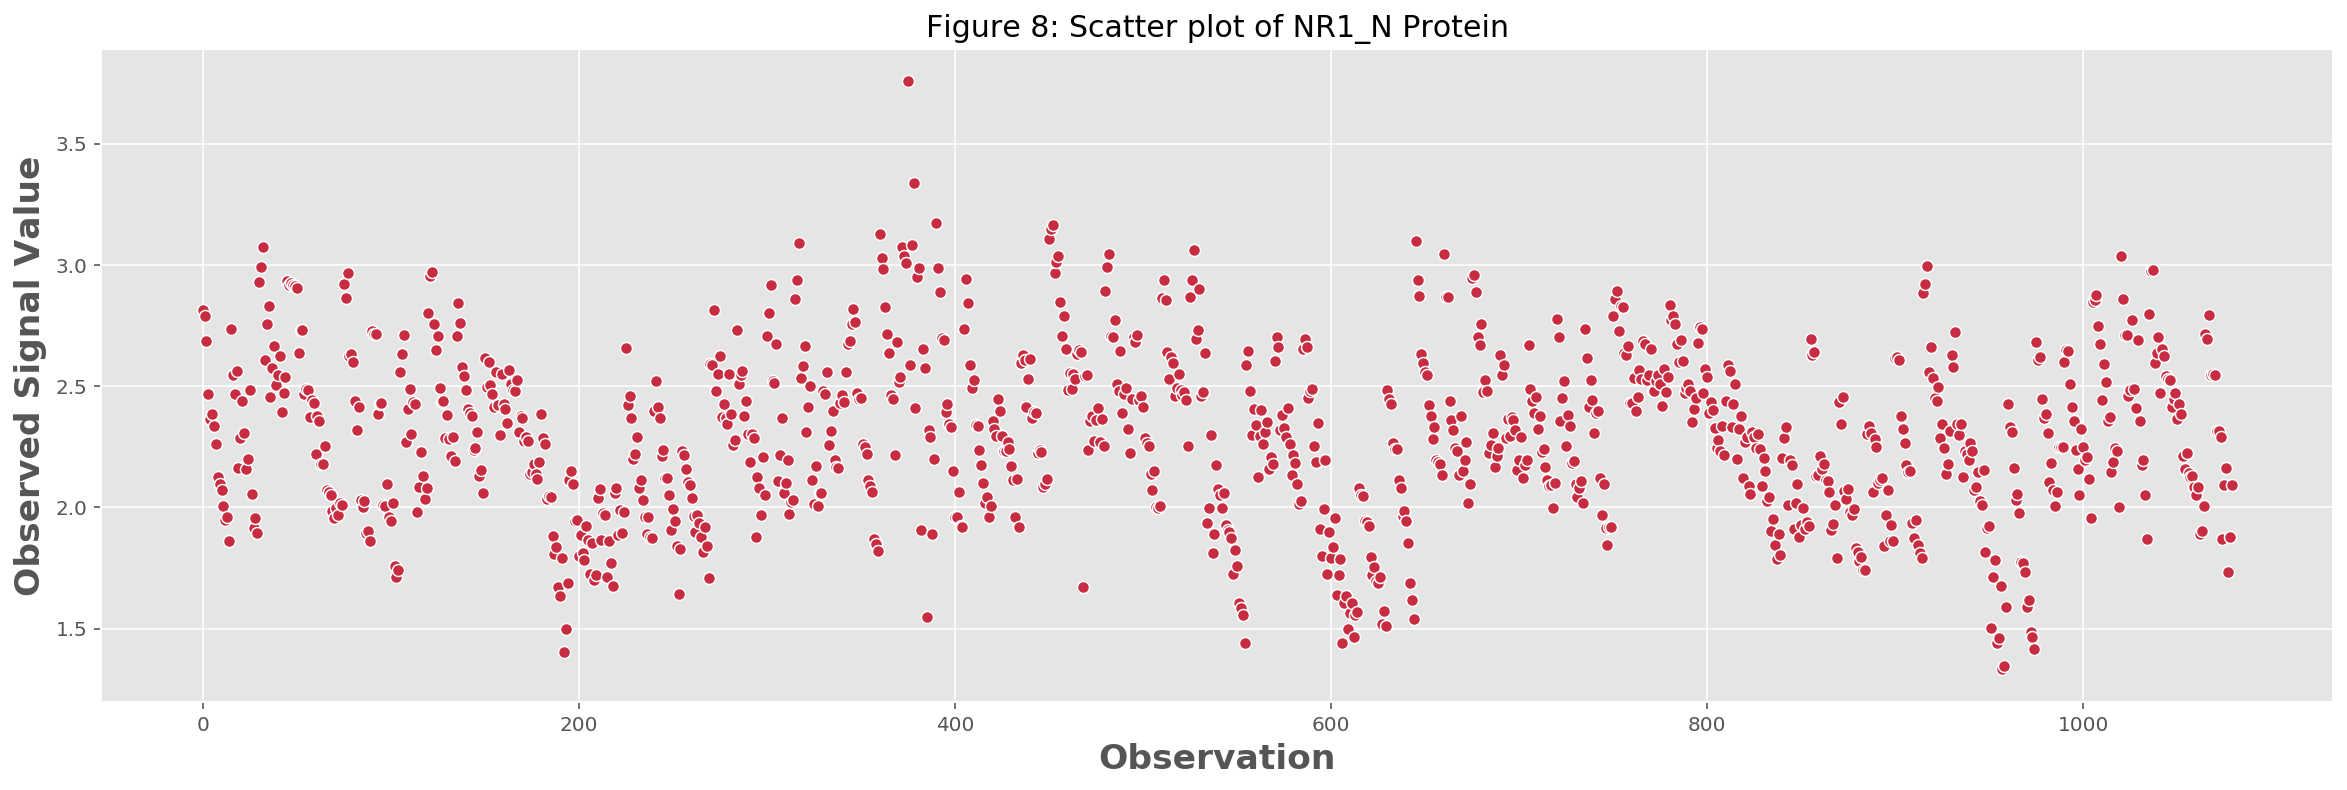

In [26]:
plt.figure(figsize=(20,6))
plot = sns.scatterplot(data = DataExpl_Data['NR1_N'],
                color='#c72c41').set_title('Figure 8: Scatter plot of NR1_N Protein',fontsize=15)
plt.ylabel('Observed Signal Value',fontsize='xx-large',fontweight='bold')
plt.xlabel('Observation', rotation='0',fontsize='xx-large',fontweight='bold')

### Exploring <code>S6_N</code> feature.

__Figure 9__ : <code>S6_N</code> Protein is right skewed. Most data falls to the right, or positive side
                                               

Text(0.5, 0, 'Protein S6_N')

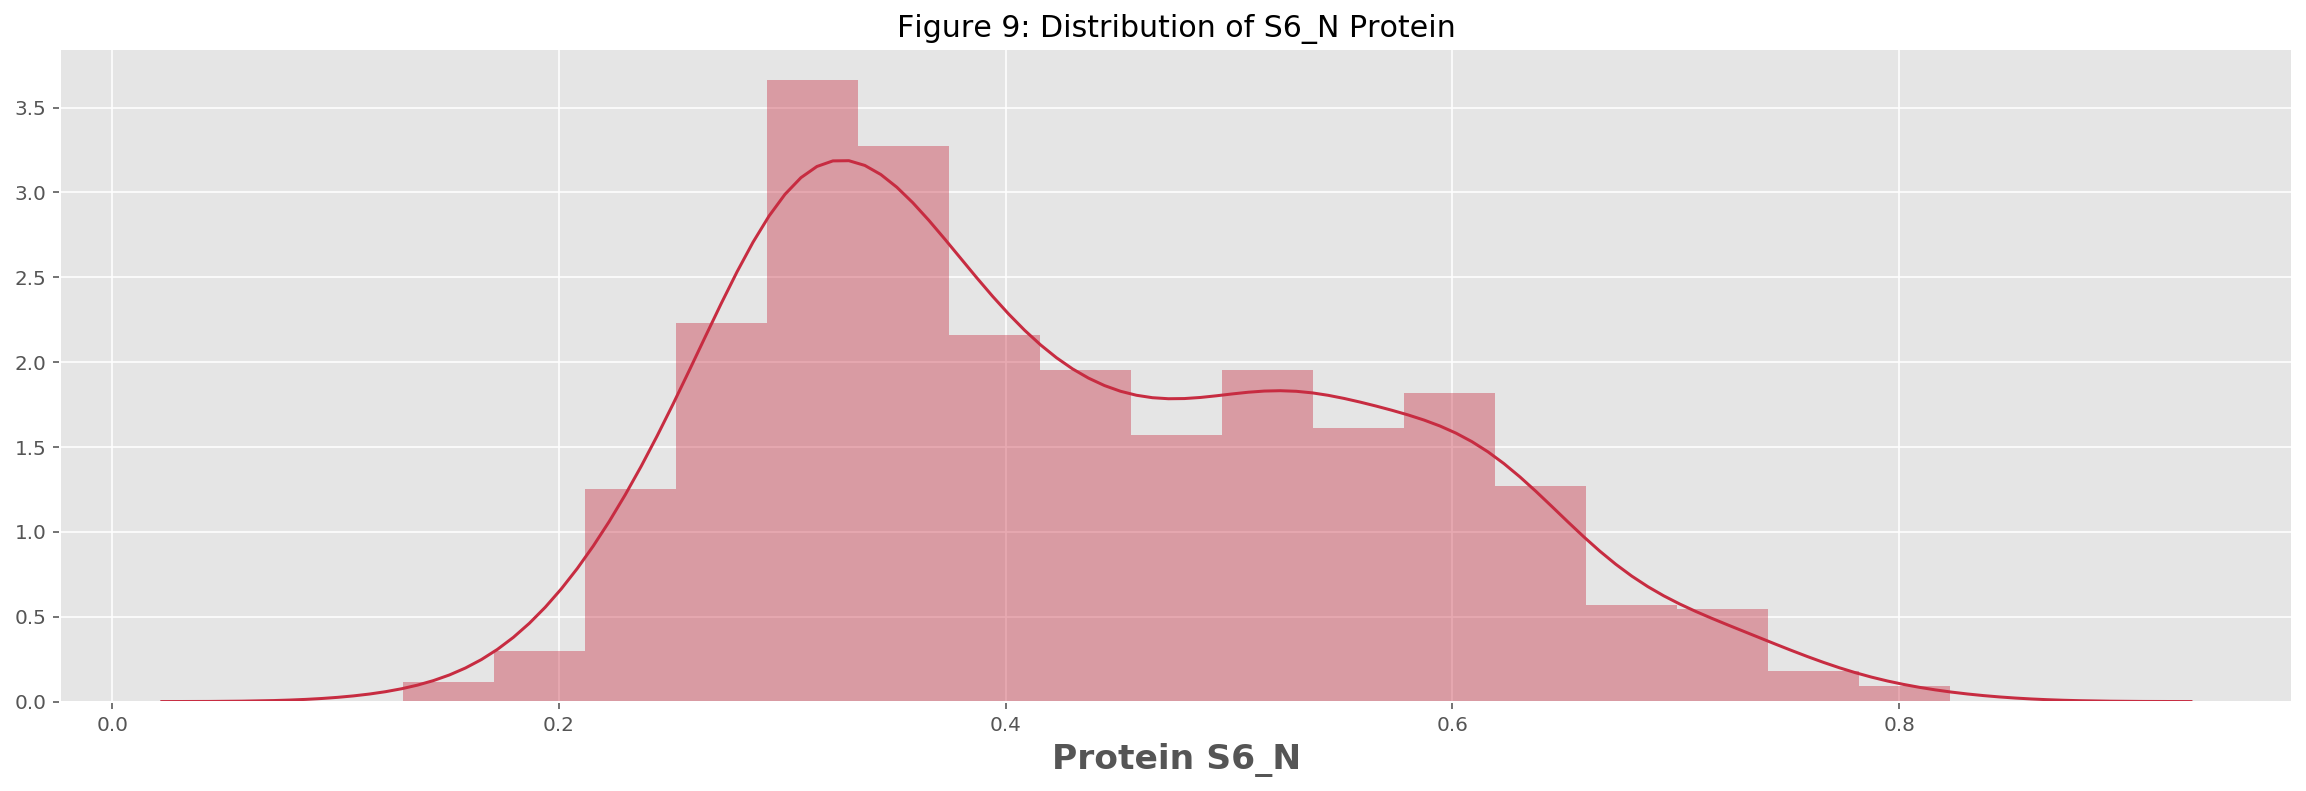

In [27]:
plt.figure(figsize=(20,6))
plot = sns.distplot(DataExpl_Data['S6_N'],
                    color='#c72c41').set_title('Figure 9: Distribution of S6_N Protein', fontsize = 15)
plt.xlabel('Protein S6_N', rotation='0',fontsize='xx-large',fontweight='bold')

### Exploring <code>CaNA_N</code> feature.

__Figure 10__ : shows that <code>CaNA_N</code> is normally distributed.
                                               

Text(0.5, 0, 'Protein CaNA_N')

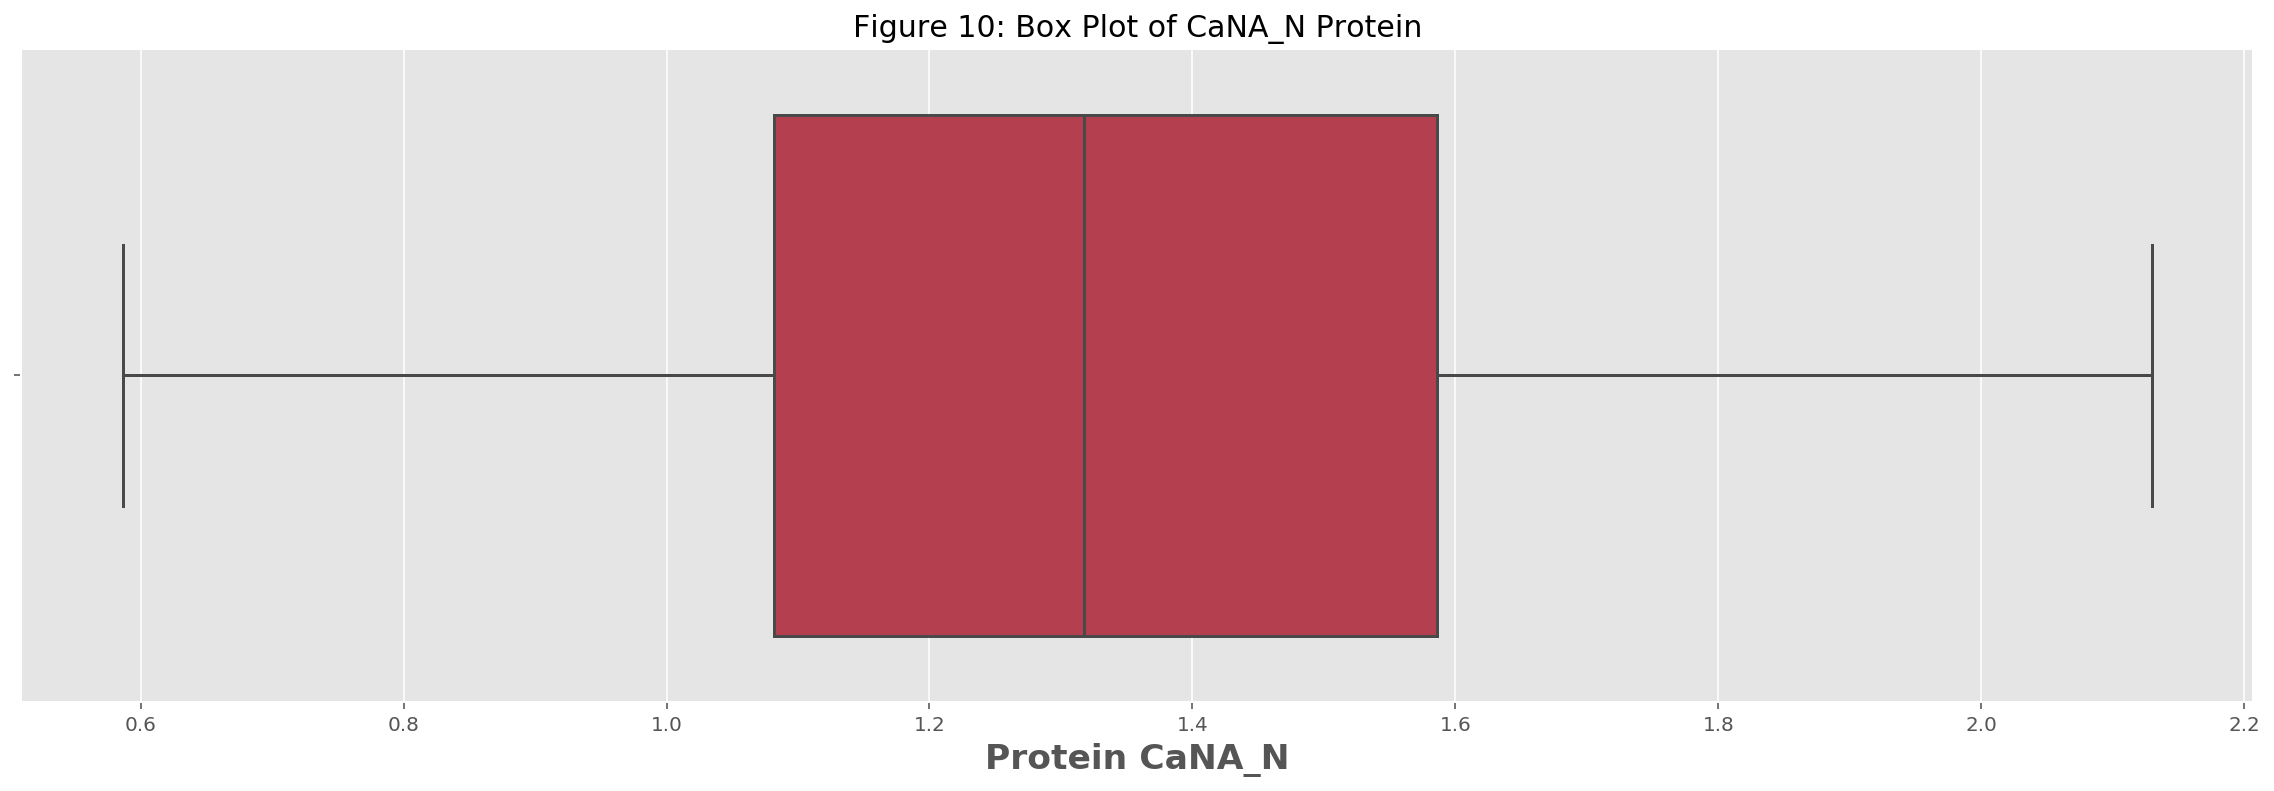

In [28]:
plt.figure(figsize=(20,6))
plot = sns.boxplot(DataExpl_Data['CaNA_N'],
                   color='#c72c41').set_title('Figure 10: Box Plot of CaNA_N Protein', fontsize=15)
plt.xlabel('Protein CaNA_N', rotation='0',fontsize='xx-large',fontweight='bold')

## Bivariate Visualizations

__Figure 11__ : shows that <code>GluR4_N</code> and <code>GluR3_N</code> Proteins are highly correlated.
                                               

Text(0.5, 0, 'GluR4_N')

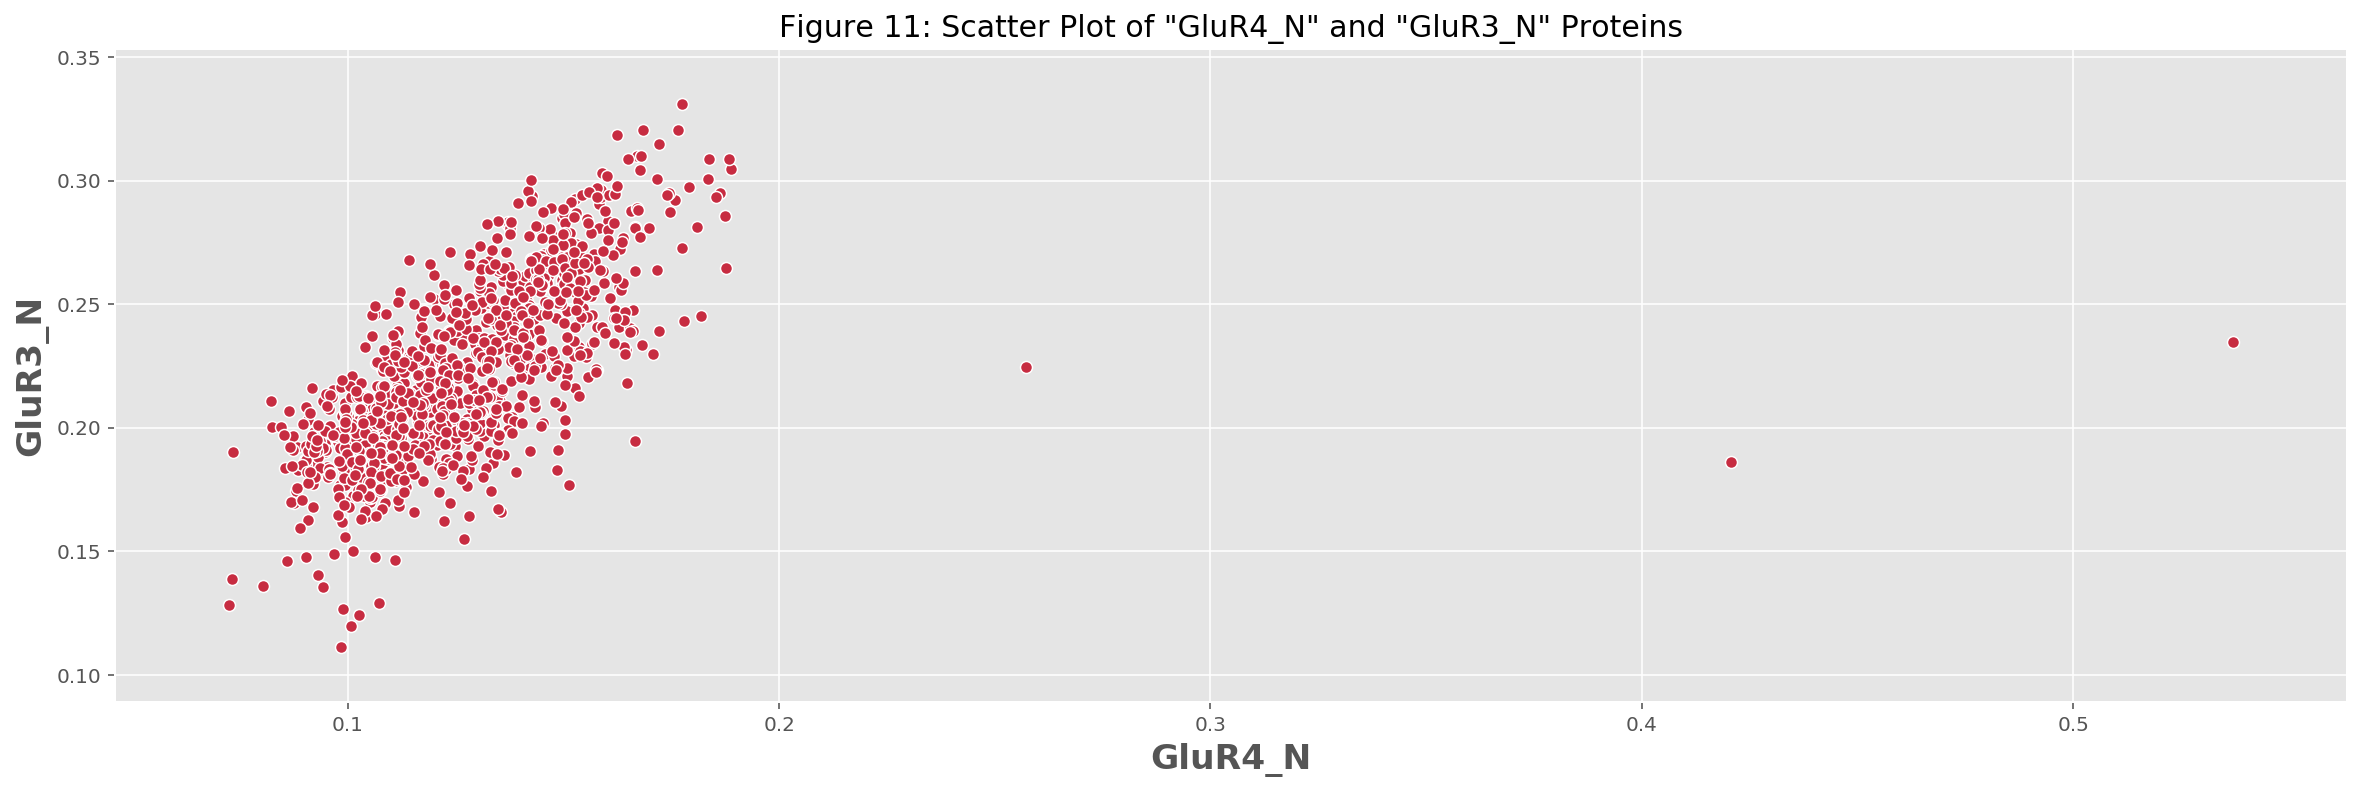

In [29]:
plt.figure(figsize=(20,6))

plot = sns.scatterplot(x="GluR4_N",
                 y="GluR3_N",
                 color='#c72c41',
                 data=DataExpl_Data).set_title('Figure 11: Scatter Plot of "GluR4_N" and "GluR3_N" Proteins',
                                               fontsize=15)
plt.ylabel('GluR3_N',fontsize='xx-large',fontweight='bold')
plt.xlabel('GluR4_N', rotation='0',fontsize='xx-large',fontweight='bold')

__Figure 12__ : shows that the <code>DYRK1A_N</code> has reacted differently on __"content-shock"__ mice.

Text(0.5, 0, 'class')

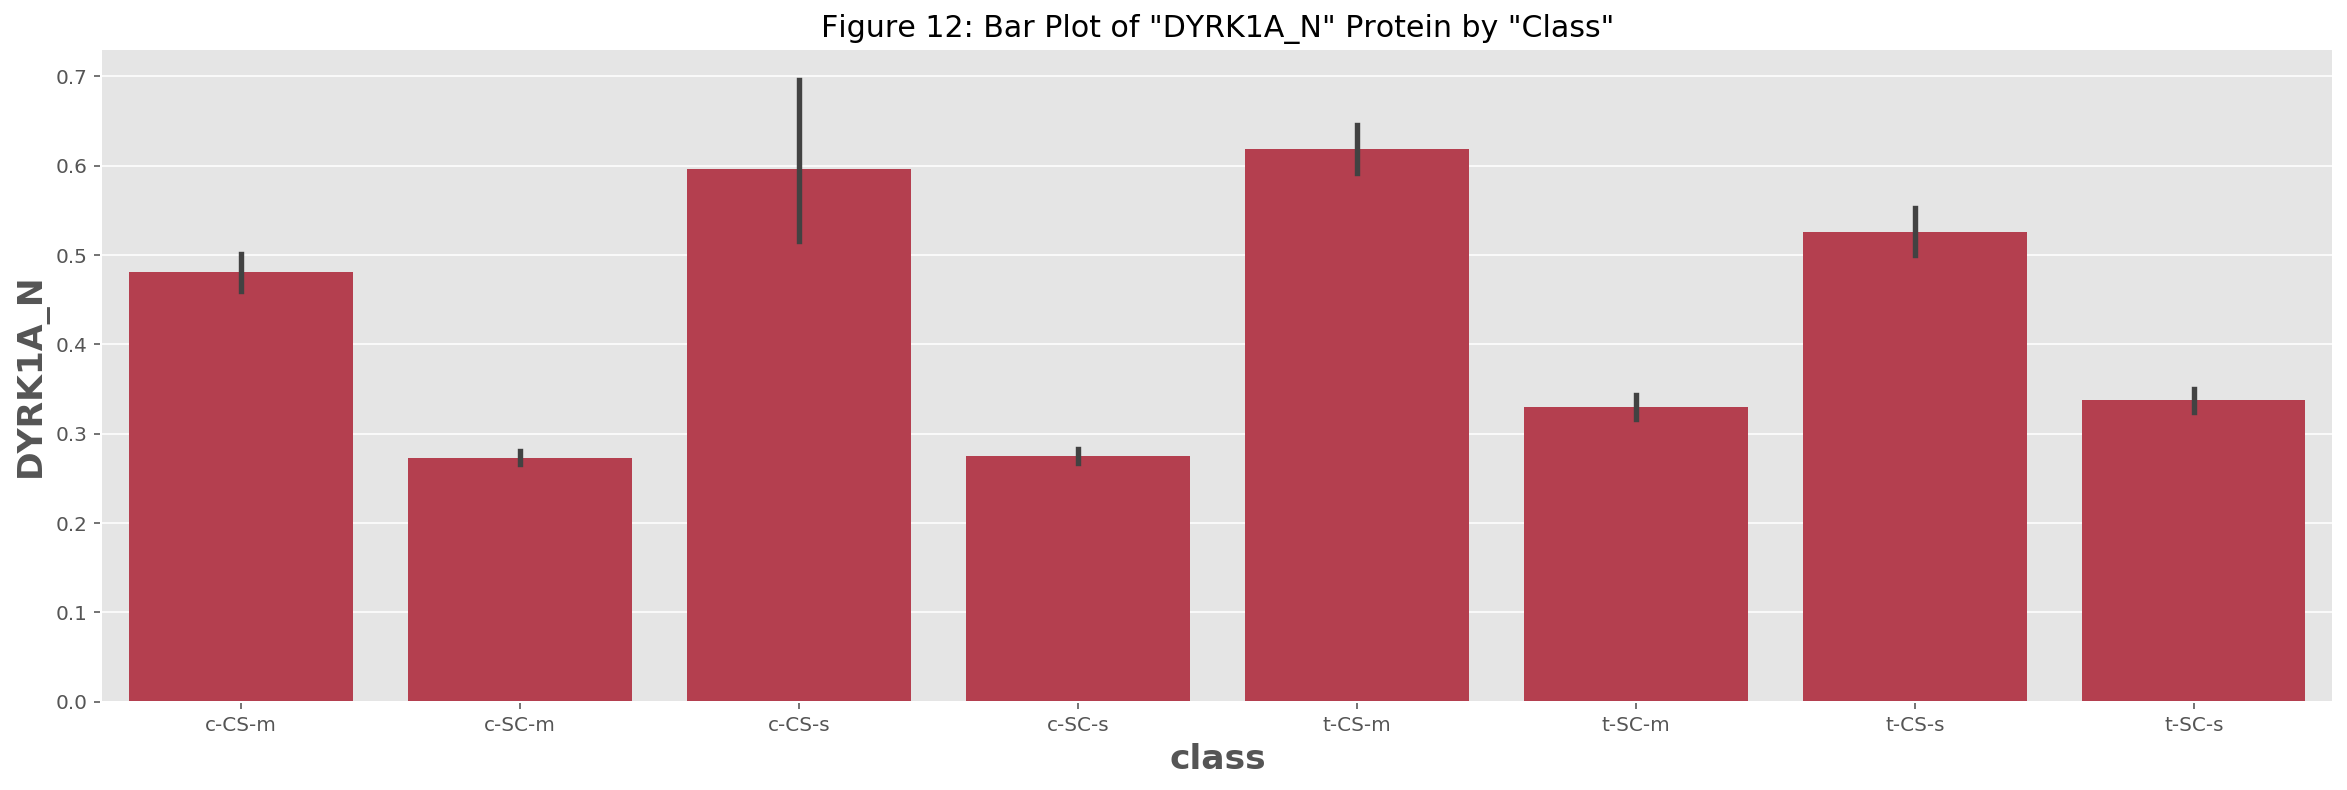

In [30]:
plt.figure(figsize=(20,6))
plot = sns.barplot(x="class",
                 y="DYRK1A_N",
                 color='#c72c41',
                 data=DataExpl_Data).set_title('Figure 12: Bar Plot of "DYRK1A_N" Protein by "Class"',
                                           fontsize=15)
plt.ylabel('DYRK1A_N',fontsize='xx-large',fontweight='bold')
plt.xlabel('class', rotation='0',fontsize='xx-large',fontweight='bold')

__Figure 13__ : shows that the mice of class __"c-CS-s"__ have shown extreme expression levels on <code>ITSN1_N</code> protein.

Text(0.5, 0, 'class')

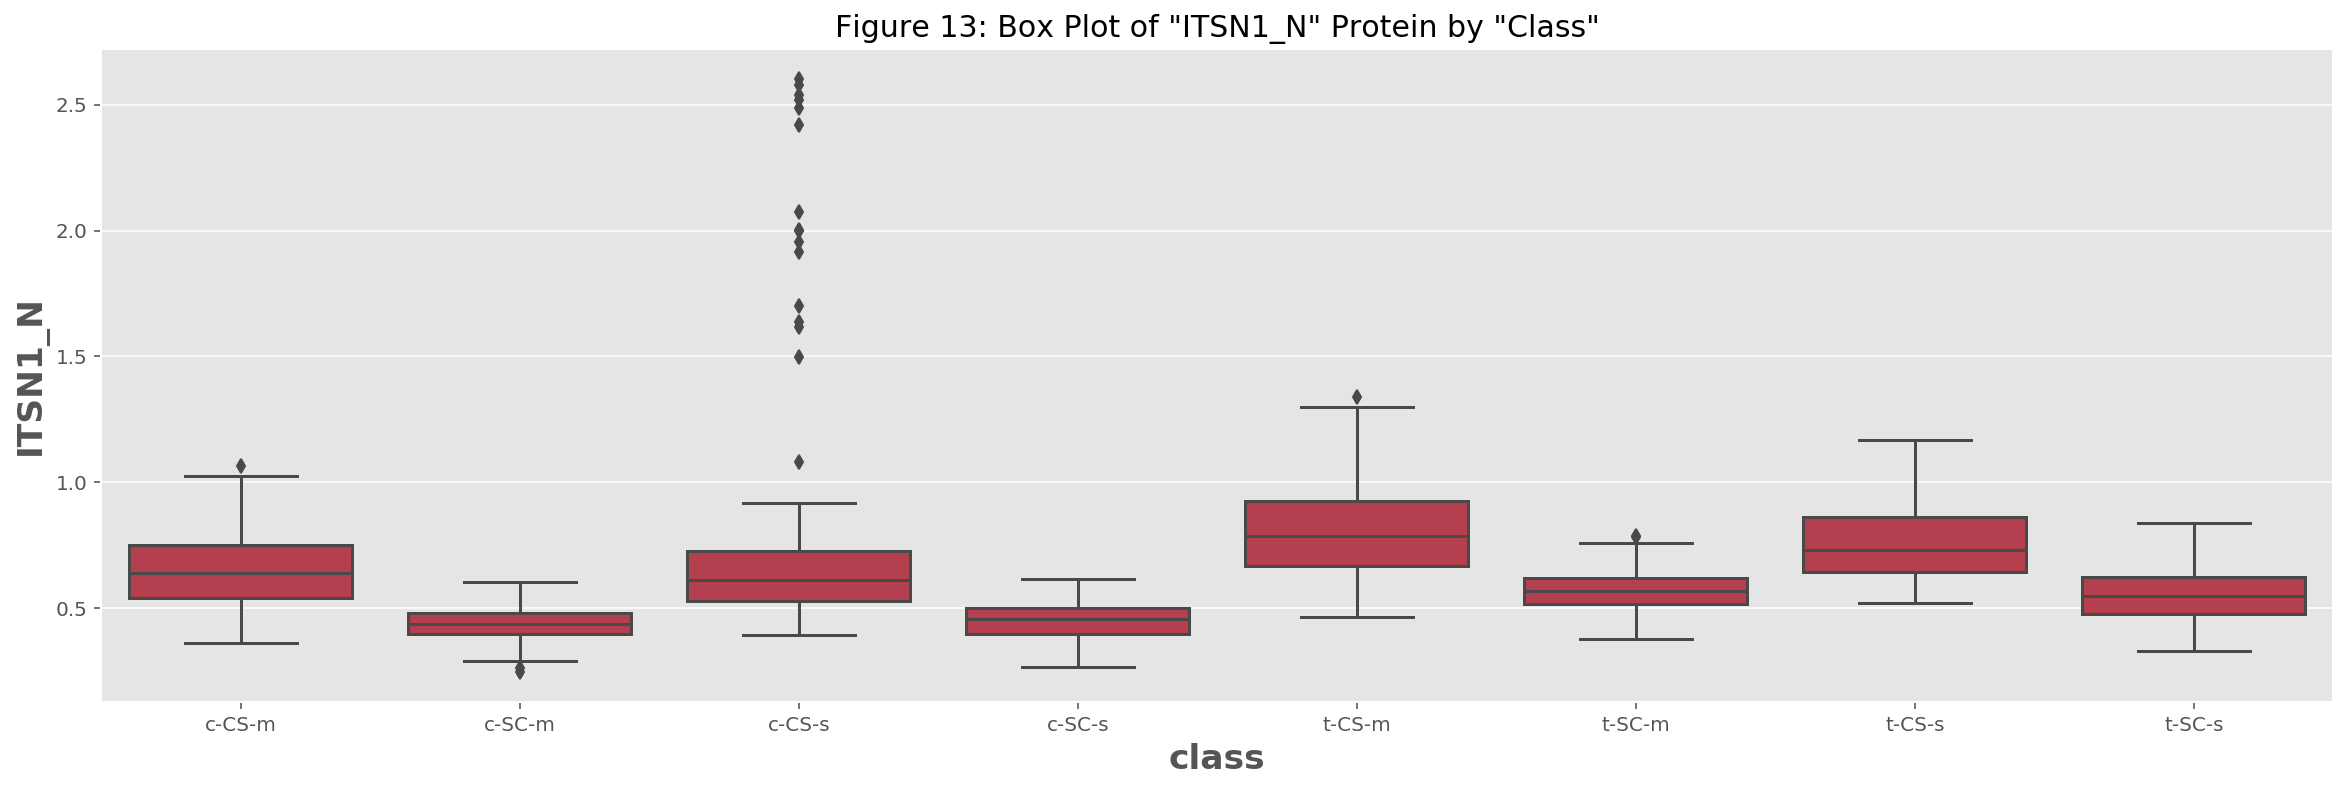

In [31]:
plt.figure(figsize=(20,6))
plot = sns.boxplot(x="class",
                   y="ITSN1_N",
                   color='#c72c41',
                   data=DataExpl_Data).set_title('Figure 13: Box Plot of "ITSN1_N" Protein by "Class"',
                                               fontsize=15)
plt.ylabel('ITSN1_N',fontsize='xx-large',fontweight='bold')
plt.xlabel('class', rotation='0',fontsize='xx-large',fontweight='bold')

__Figure 14__: The expression levels of <code>SOD1_N</code> protein is more in the __“shock-context”__ mice when compared to of __“content-shock”__ group of mice.

Text(0.5, 0, 'class')

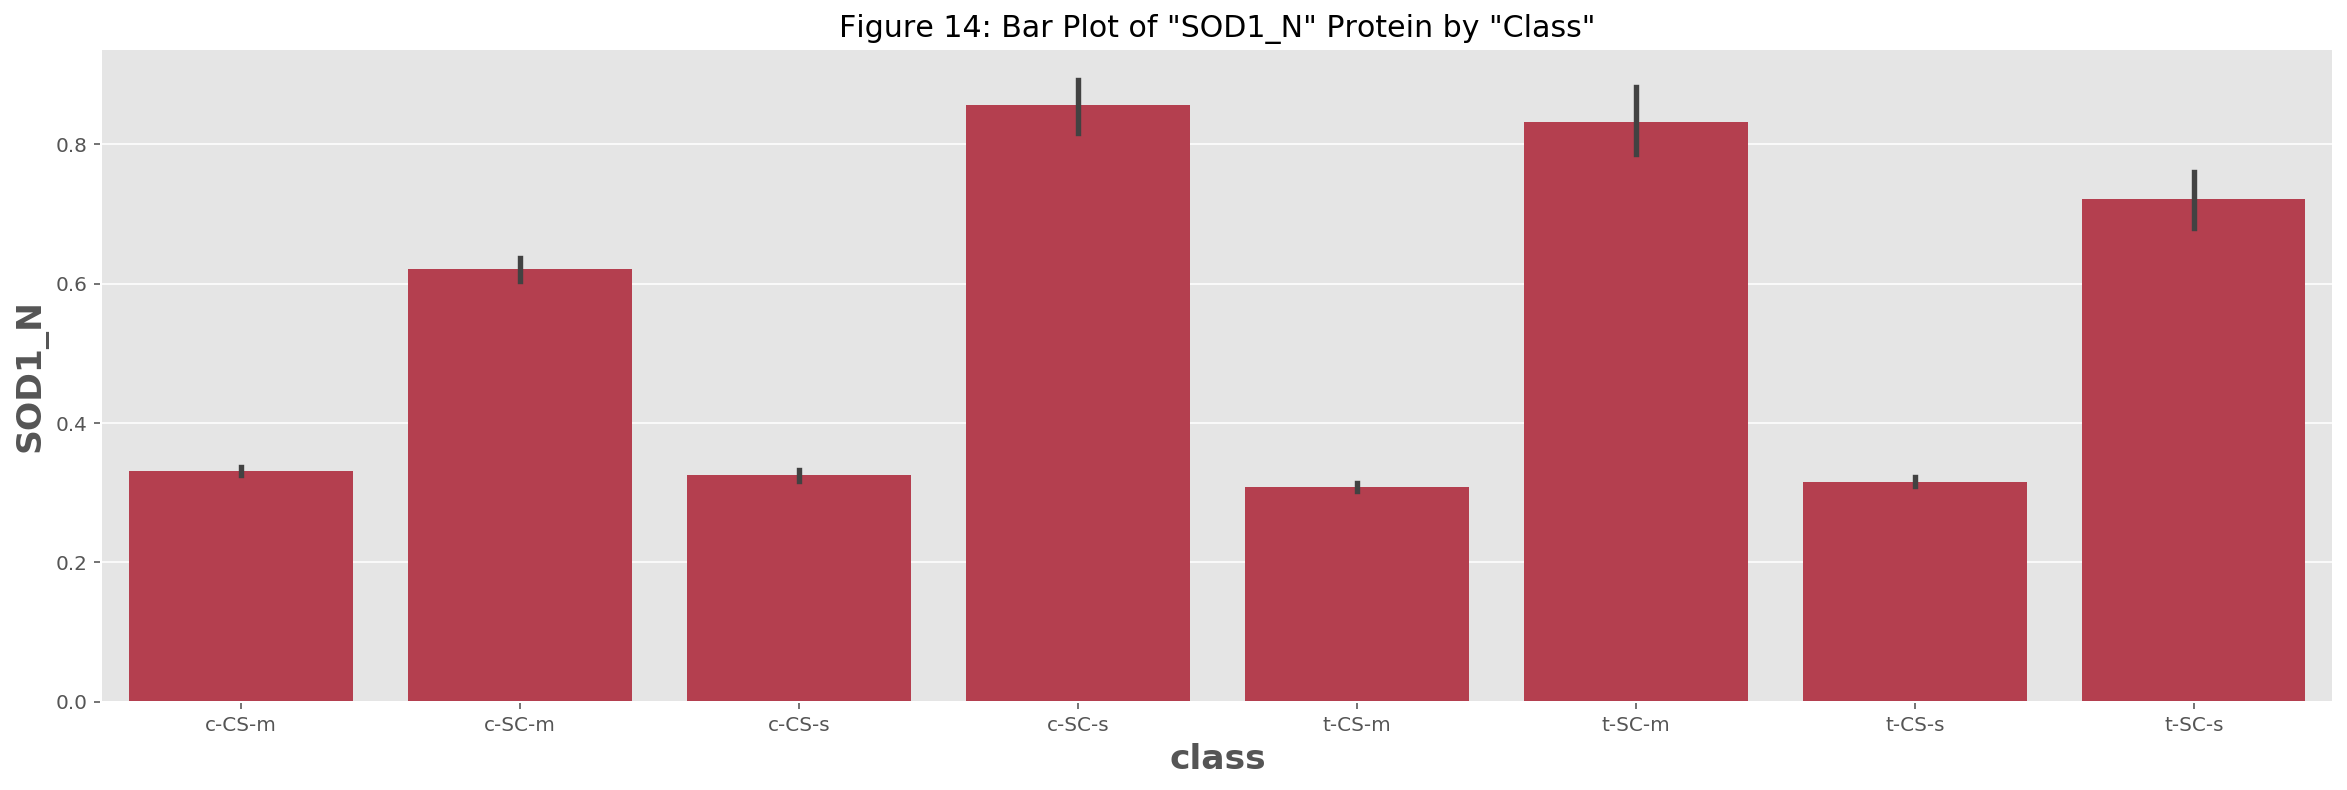

In [32]:
plt.figure(figsize=(20,6))
plot = sns.barplot(x="class",
                 y="SOD1_N",
                 color='#c72c41',
                 data=DataExpl_Data)
plt.title('Figure 14: Bar Plot of "SOD1_N" Protein by "Class"',fontsize=15)
plt.ylabel('SOD1_N',fontsize='xx-large',fontweight='bold')
plt.xlabel('class', rotation='0',fontsize='xx-large',fontweight='bold')

__Figure 15__ : shows that <code>BAX_N</code> and <code>ITSN1_N</code> are correlated.

Text(0.5, 0, 'ITSN1_N')

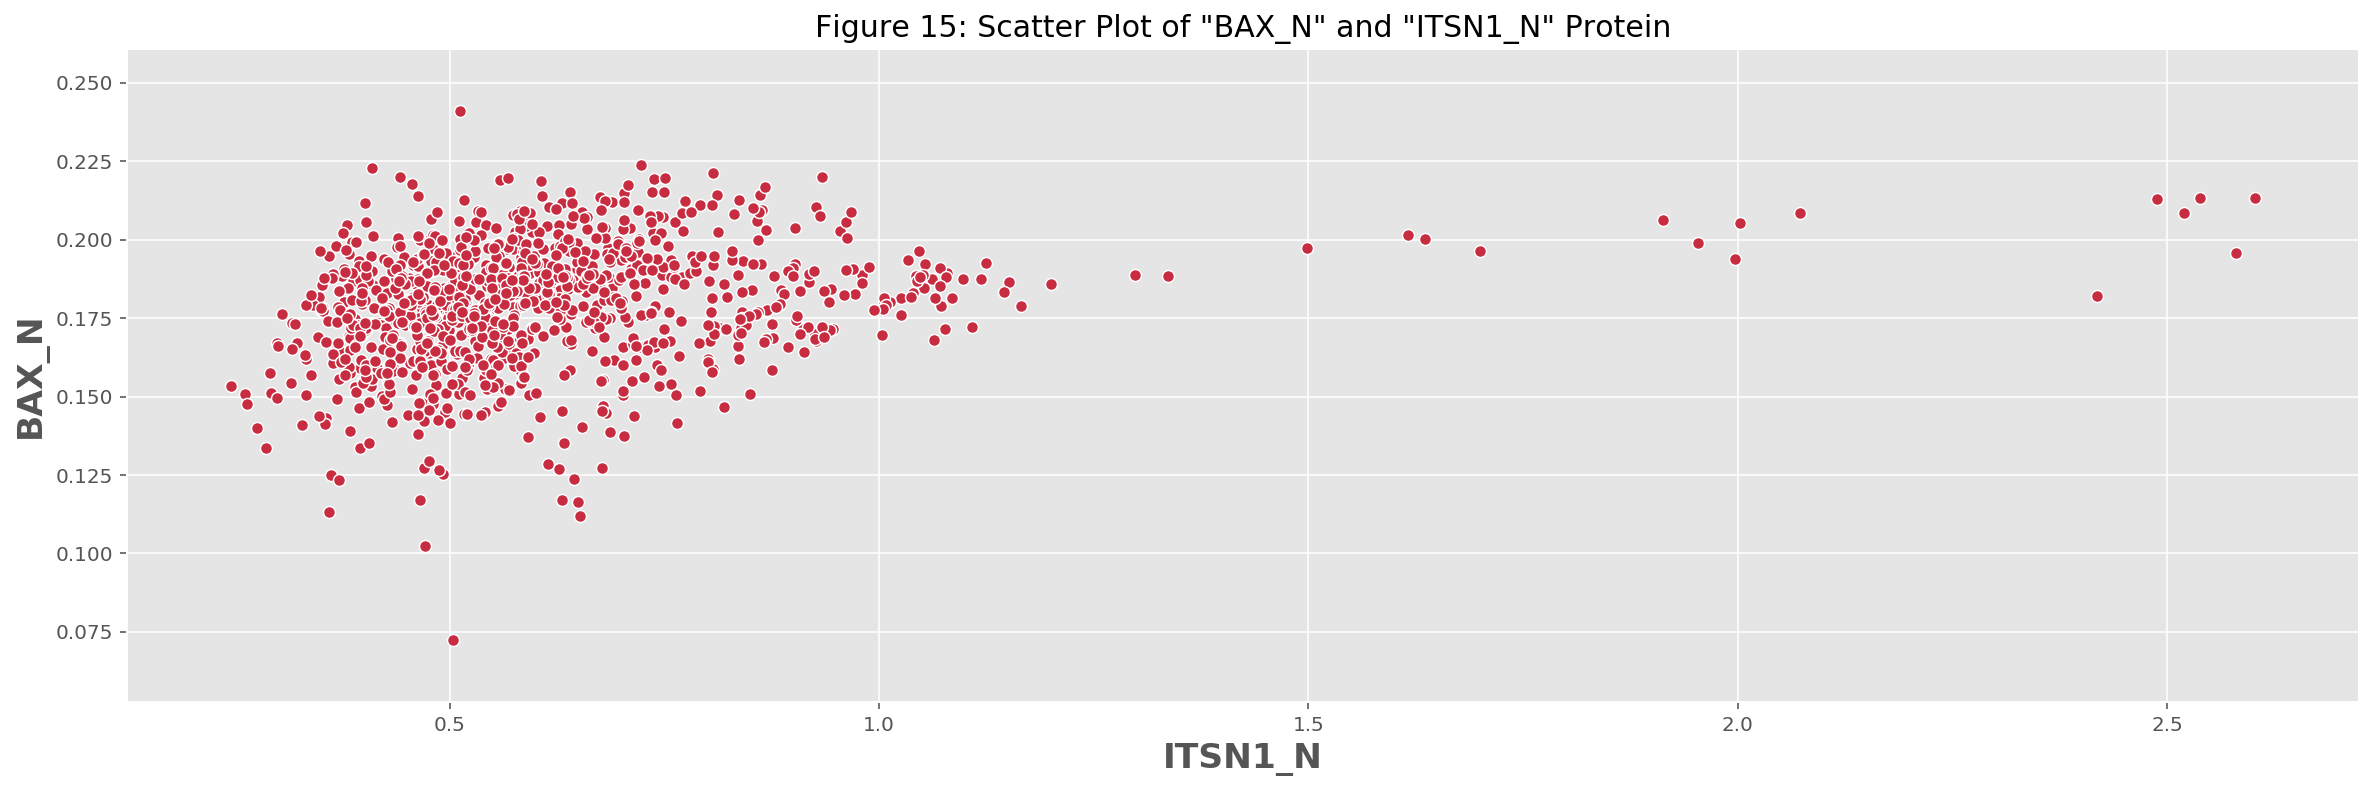

In [33]:
plt.figure(figsize=(20,6))
plot = sns.scatterplot(x="ITSN1_N",
                 y="BAX_N",
                 color='#c72c41',
                 data=DataExpl_Data).set_title('Figure 15: Scatter Plot of "BAX_N" and "ITSN1_N" Protein',
                                           fontsize=15)
plt.ylabel('BAX_N',fontsize='xx-large',fontweight='bold')
plt.xlabel('ITSN1_N', rotation='0',fontsize='xx-large',fontweight='bold')

__Figure 16__: shows that mice of all the classes showed similar expression levels for <code>SYP_N</code> protein.

Text(0.5, 0, 'class')

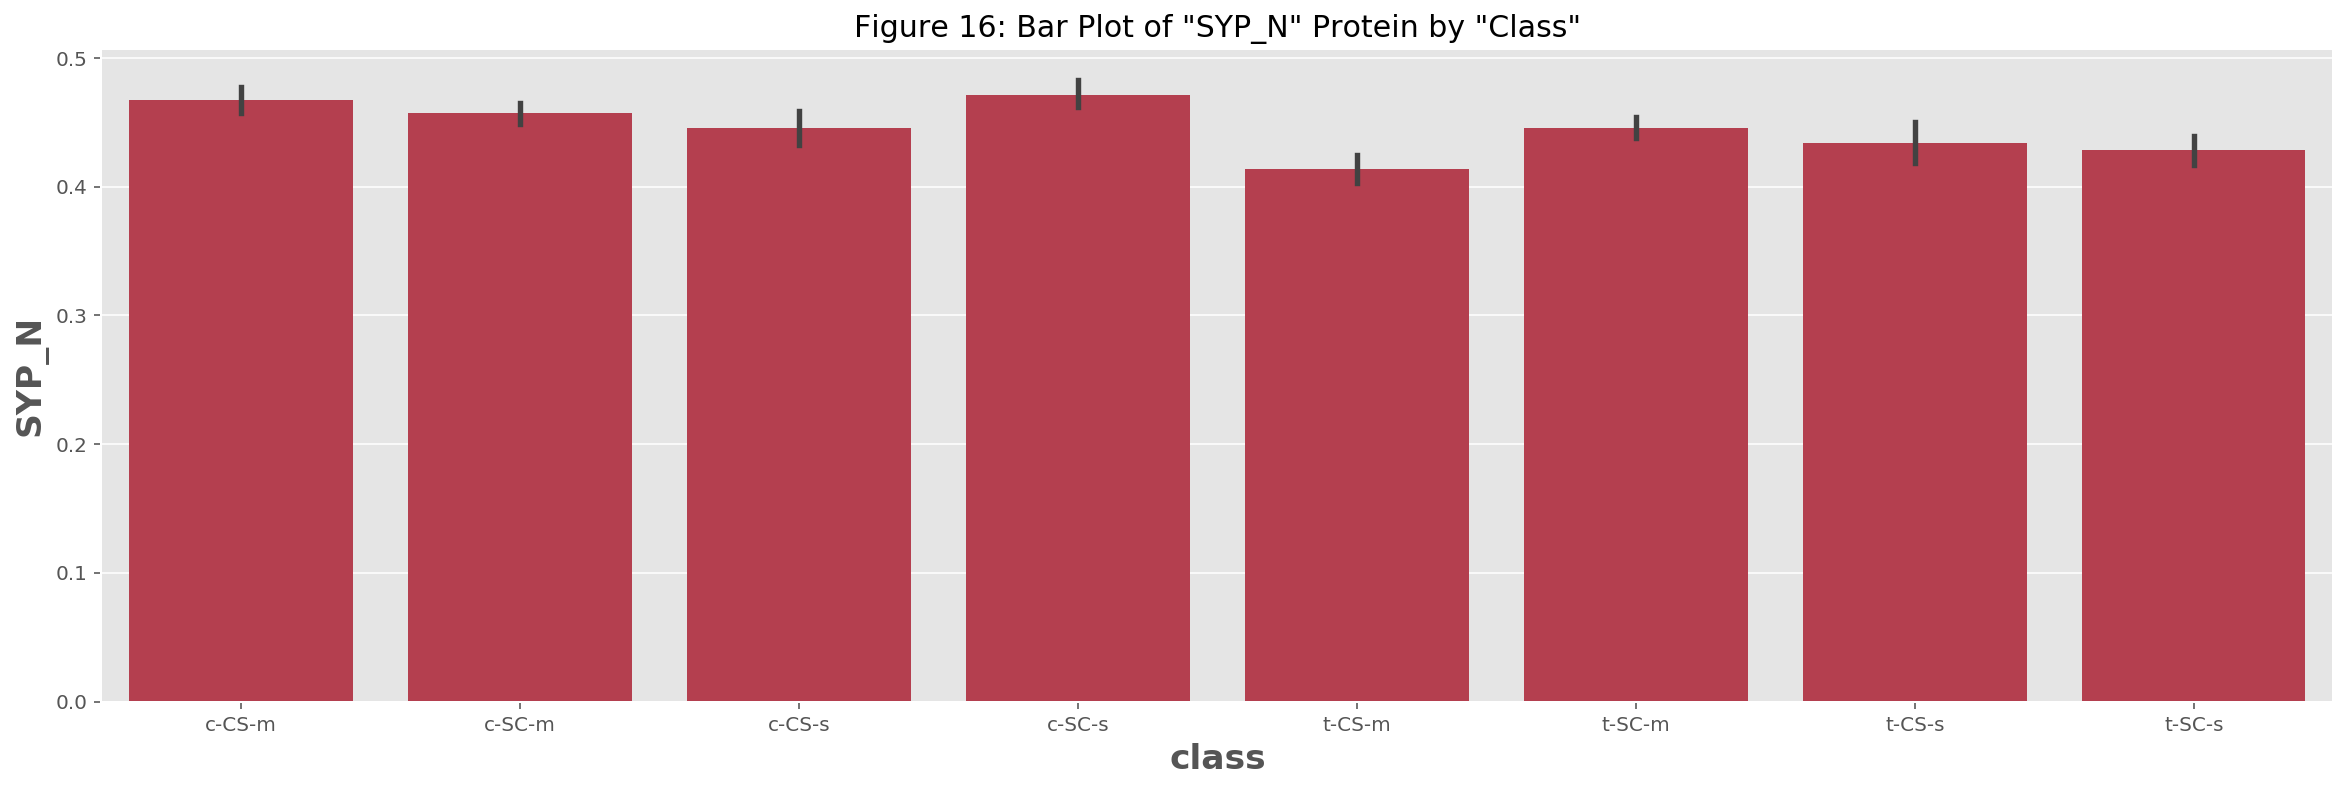

In [34]:
plt.figure(figsize=(20,6))
plot = sns.barplot(x="class",
                 y="SYP_N",
                 color='#c72c41',
                 data=DataExpl_Data).set_title('Figure 16: Bar Plot of "SYP_N" Protein by "Class"',
                                               fontsize=15)
plt.ylabel('SYP_N',fontsize='xx-large',fontweight='bold')
plt.xlabel('class', rotation='0',fontsize='xx-large',fontweight='bold')

__Figure 17__: From the boxplots, __"context-shock"__ grouped mice showed higher expression levels for the <code>CaNA_N</code>.

Text(0.5, 0, 'class')

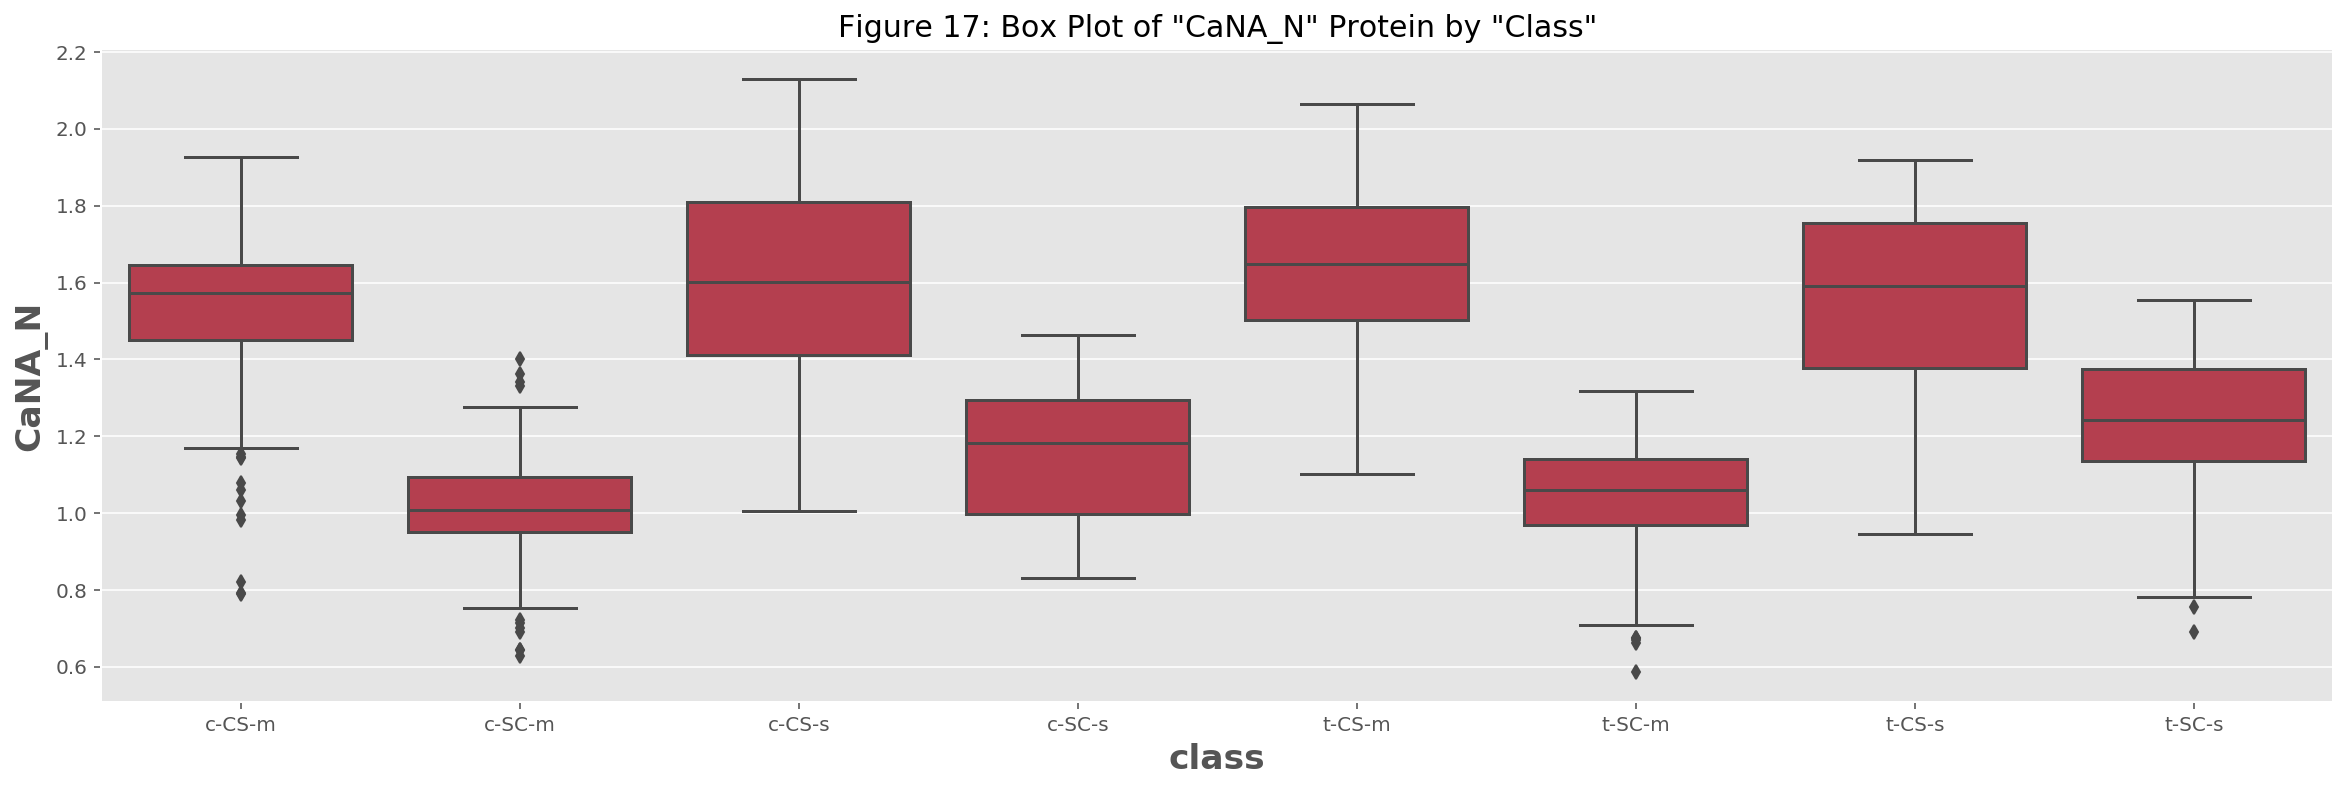

In [35]:
plt.figure(figsize=(20,6))
plot = sns.boxplot(x="class",
                 y="CaNA_N",
                 color='#c72c41',
                 data=DataExpl_Data).set_title('Figure 17: Box Plot of "CaNA_N" Protein by "Class"',
                                               fontsize=15)
plt.ylabel('CaNA_N',fontsize='xx-large',fontweight='bold')
plt.xlabel('class', rotation='0',fontsize='xx-large',fontweight='bold')

__Figure 18__: From the below graph, it seems that AcetylH3K9_N protein has extreme expression levels on “t-SC-s” class mice and every low expression on “c-CS-m” mice.

Text(0.5, 6.79999999999999, 'class')

<Figure size 1440x432 with 0 Axes>

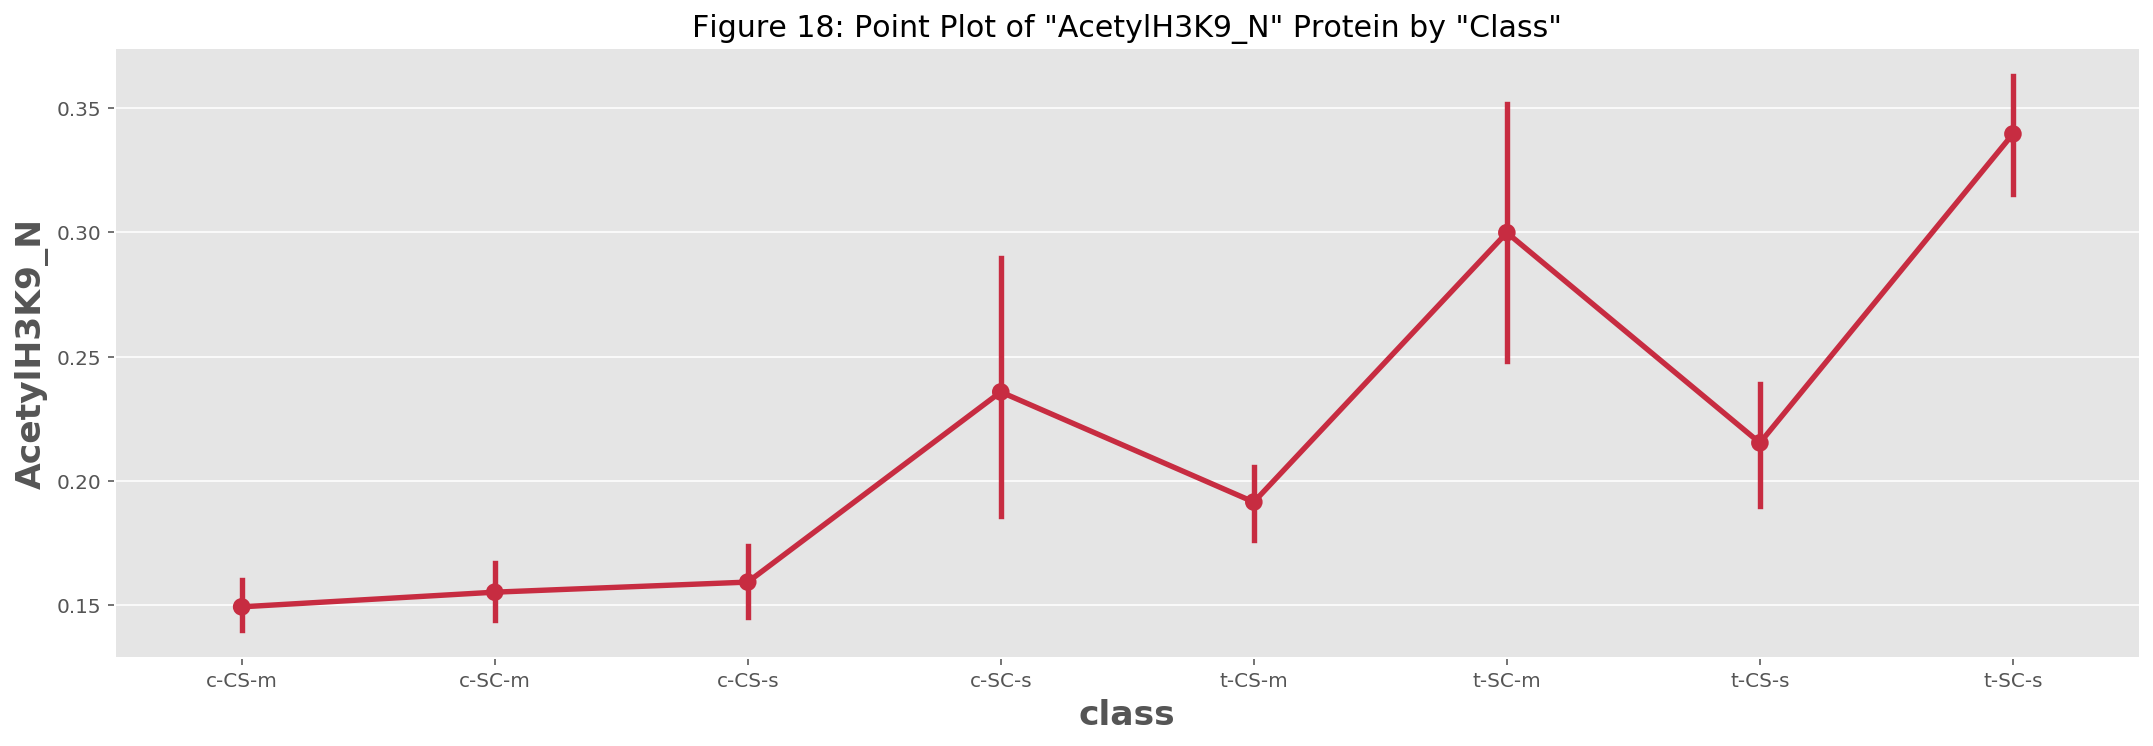

In [36]:
plt.figure(figsize=(20,6))
plot = sns.catplot(x="class",
                   y="AcetylH3K9_N",
                   color='#c72c41',
                   data=DataExpl_Data, kind = "point", aspect = 3)
plt.title('Figure 18: Point Plot of "AcetylH3K9_N" Protein by "Class"', fontsize=15)
plt.ylabel('AcetylH3K9_N',fontsize='xx-large',fontweight='bold')
plt.xlabel('class', rotation='0',fontsize='xx-large',fontweight='bold')

__Figure 19__: There is no significant correlation amongst <code>Tau_N</code> and <code>JNK_N</code>.

Text(0.5, 0, 'Tau_N')

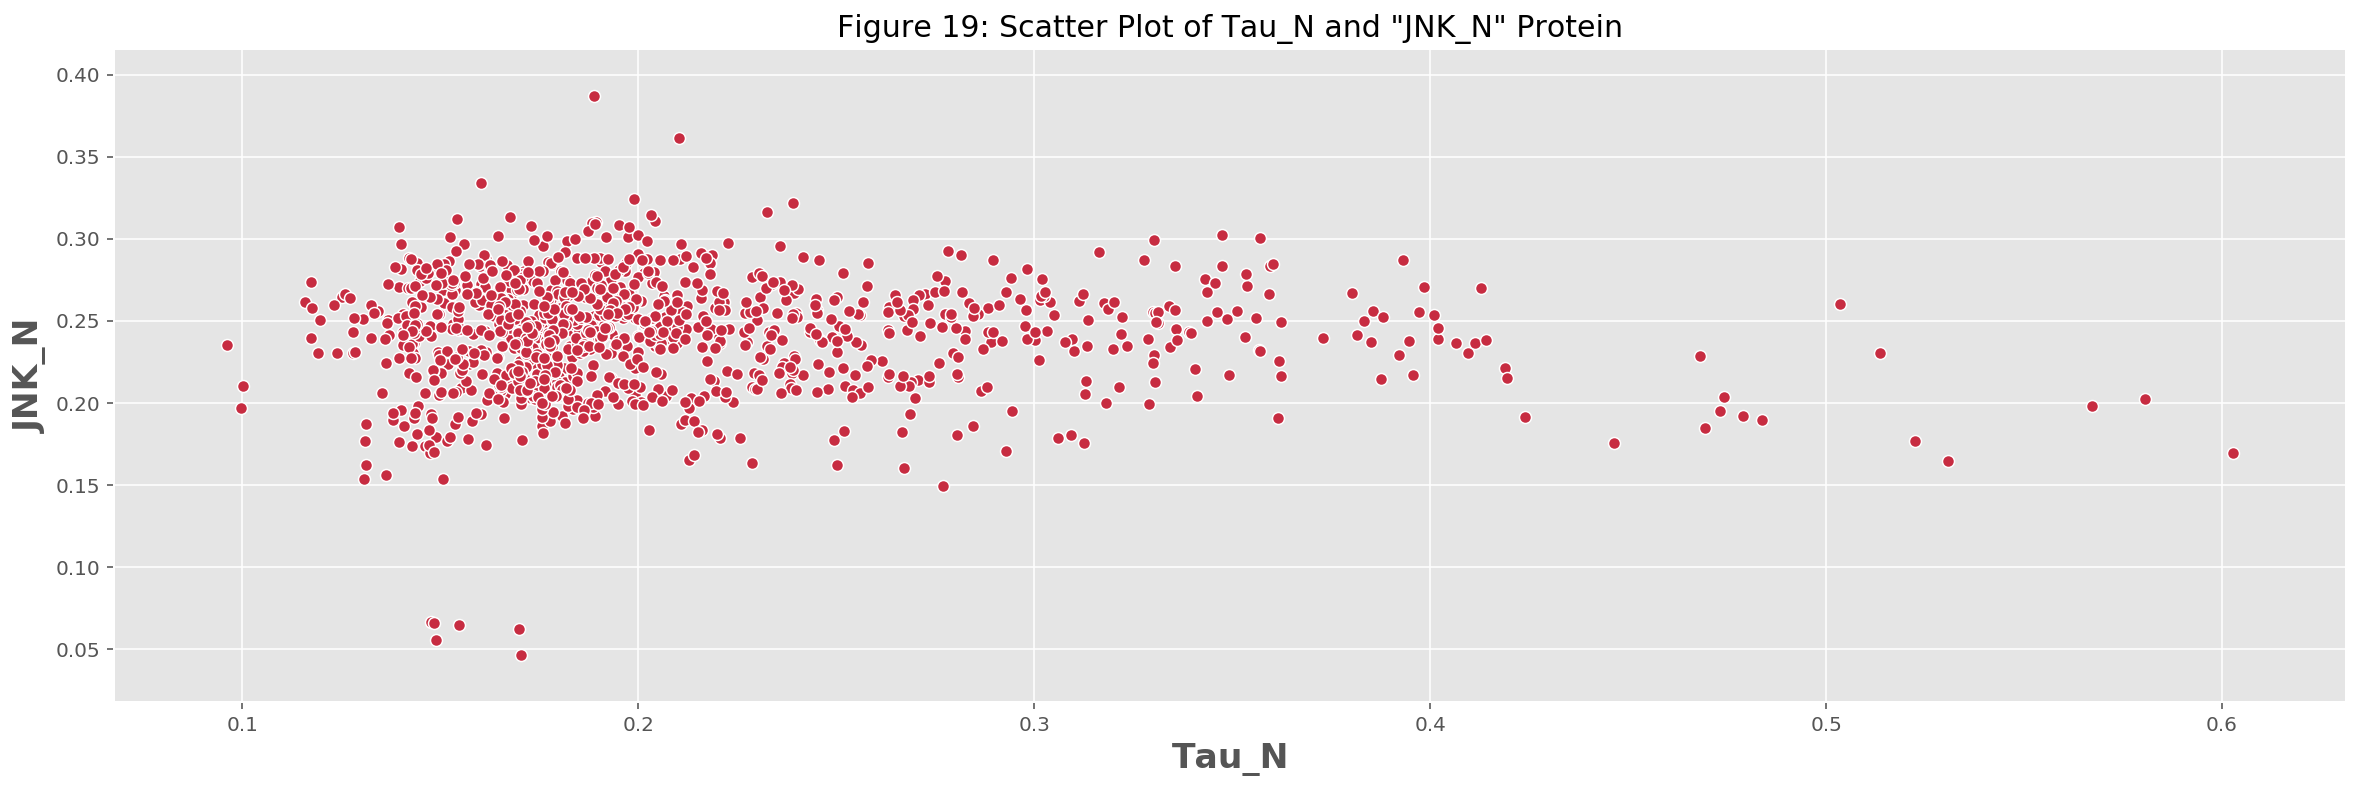

In [37]:
plt.figure(figsize=(20,6))
plot = sns.scatterplot(x="Tau_N",
                 y="JNK_N",
                 color='#c72c41',
                 data=DataExpl_Data).set_title('Figure 19: Scatter Plot of Tau_N and "JNK_N" Protein',
                                               fontsize=15)
plt.ylabel('JNK_N',fontsize='xx-large',fontweight='bold')
plt.xlabel('Tau_N', rotation='0',fontsize='xx-large',fontweight='bold')

__Figure 20__: H3AcK18_N has had different effects on the mice of “t-SC-m” class. We can see many mice to have reacted very differently from rest of the classes.

Text(0.5, 0, 'class')

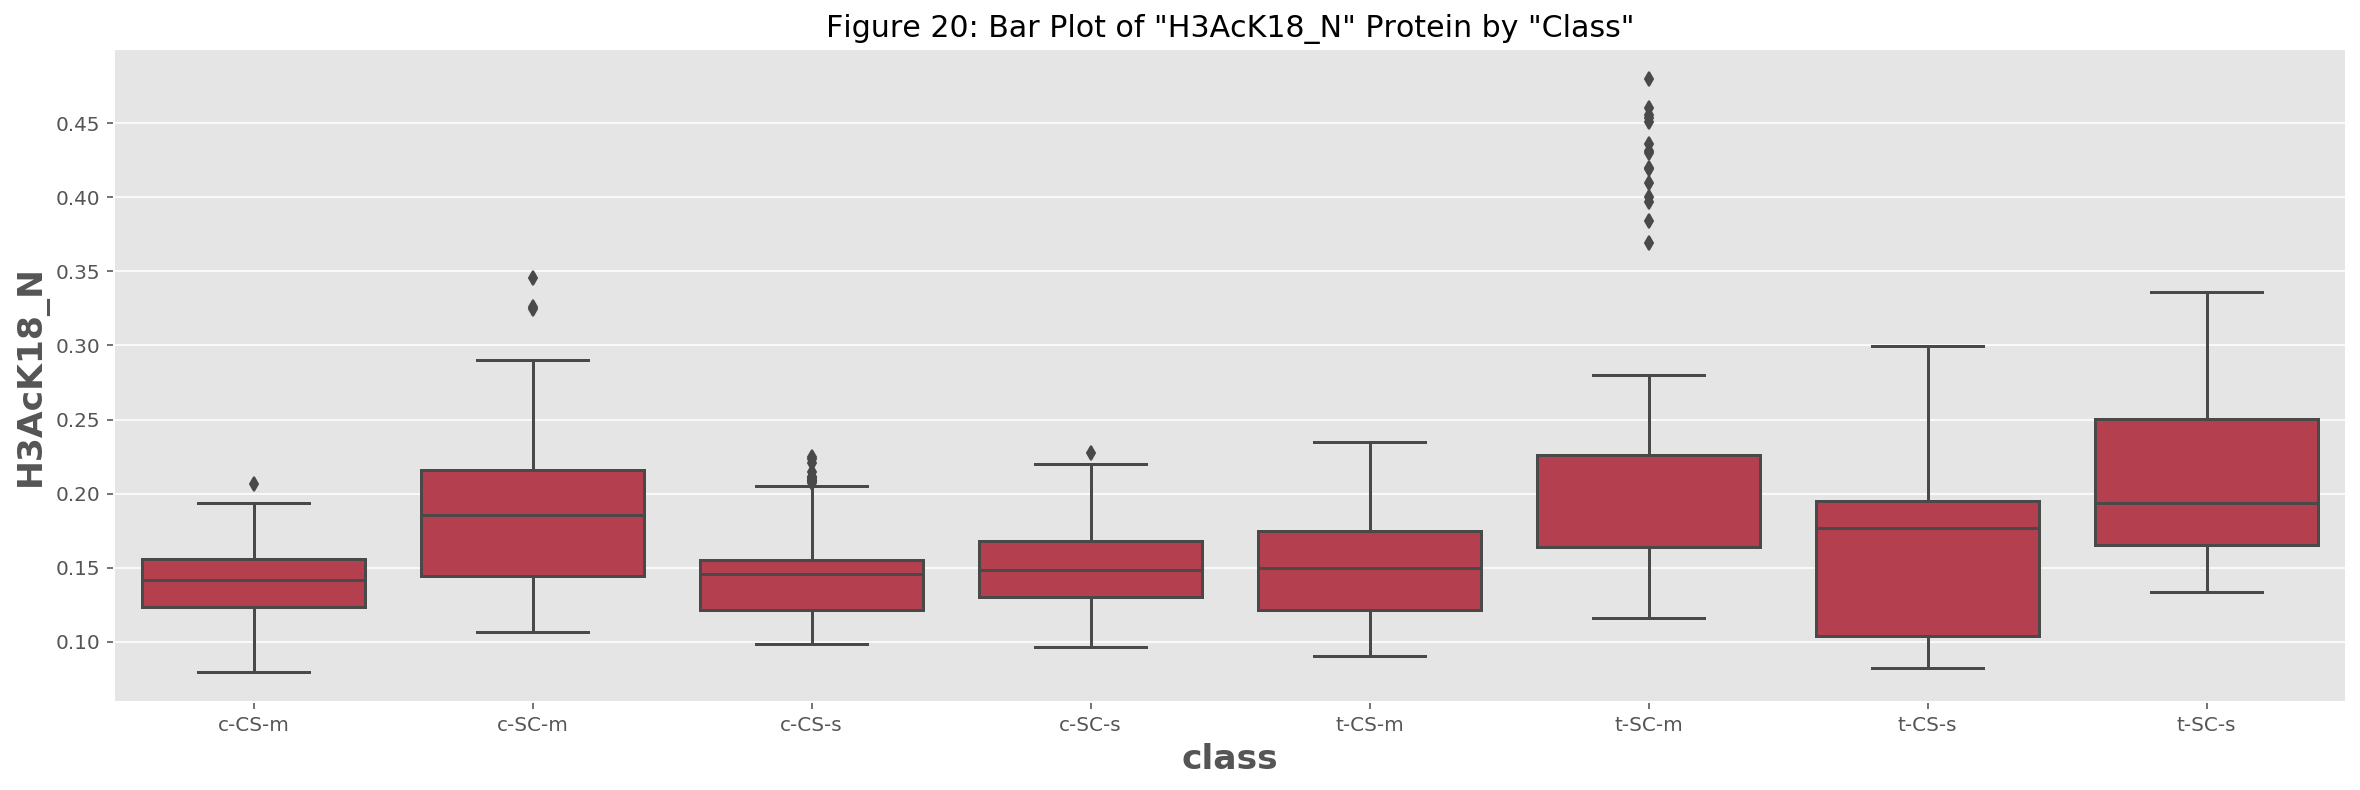

In [38]:
plt.figure(figsize=(20,6))
plot = sns.boxplot(x="class",
                 y="H3AcK18_N",
                 color='#c72c41',
                 data=DataExpl_Data).set_title('Figure 20: Bar Plot of "H3AcK18_N" Protein by "Class"',
                                               fontsize=15)
plt.ylabel('H3AcK18_N',fontsize='xx-large',fontweight='bold')
plt.xlabel('class', rotation='0',fontsize='xx-large',fontweight='bold')

# Data Modelling

It is observed that the class feature has the information regarding <code>Genotype</code>, <code>Treatment</code> and <code>Behavior</code>. Hence these features are dropped and are not considered for modelling.

In [39]:
Data_Modelling = DataPrep_Data.copy()

Data_Modelling = Data_Modelling.drop(columns = 'Genotype')
Data_Modelling = Data_Modelling.drop(columns = 'Treatment')
Data_Modelling = Data_Modelling.drop(columns = 'Behavior')

Data = Data_Modelling.drop(columns = 'class')
target = Data_Modelling['class']

print("Data")
print(Data.shape)
print("\nTarget")
print(target.value_counts())

Data
(1080, 77)

Target
c-CS-m    150
c-SC-m    150
t-SC-m    135
t-CS-m    135
c-CS-s    135
t-SC-s    135
c-SC-s    135
t-CS-s    105
Name: class, dtype: int64


# K - Nearest Neighbours 

## PHASE : Feature selection 

* Selecting the best feature has many benifits such as Reduces Overfitting, Improves Accuracy, Reduces Training Time, Increases Efficiency.
* Simple Hill Climbing Algorithm is made used for the purpose of feature selection.

In [40]:
new_Ind = []
cur_MaxScore = 0.0
col_num = 77
col_Ind_Random = shuffle(range(0,col_num), random_state=999)

for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    new = Data.iloc[:, new_Ind]
    DX_train, DX_test, Ty_train, Ty_test = train_test_split(new,
                                                            target,
                                                            test_size=0.3,
                                                            random_state=999,
                                                            stratify = target)
    FSclf = KNeighborsClassifier()
    fit = FSclf.fit(DX_train, Ty_train)
    cur_Score = FSclf.score(DX_test, Ty_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))

Score with 58 selected features: 0.9753086419753086


## PHASE : Training and Validating the Model

* 58 features were selected by hill climbing algorithm. A new dataset is created with the set of new features.
* This new dataset is then slipt into training and testing sets in the ratio 70:30.

In [41]:
KNNfeaturesSelected = Data.columns[new_Ind]
KNN_Data = Data[KNNfeaturesSelected]    

D_train, D_test, t_train, t_test = train_test_split(KNN_Data, 
                                                    target, 
                                                    test_size = 0.3, 
                                                    random_state = 999,
                                                    stratify = target
                                                   )

### K-fold Cross Validation and Hyper Parameter Tuning

__K-fold Cross Validation__ :
* k-fold cross validation is performed with K=10.  

__Hyper Parameter Tuning__:
* Number of Neighbor = 1,2,3,4,5,6,7,8,9,10,15,20,25,30,33.
* P Value = 1, 2.
* Weights = distance, uniform.

In [42]:
Neighbours = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,33]
P_value = [1,2]
Weights = ["distance","uniform"]

In [43]:
from sklearn.model_selection import KFold

neighbours = []
p_value = []
bestfeatures = []
cv_Score = []
weights = []
numfeatures = []

def knn(Dataset, target, n, p, wmetric, df):  
    
    
    #run the KFlod cross validation
    kf = KFold(n_splits=10,random_state=999, shuffle=True)
    score = 0
    for k, (train_index, test_index) in enumerate(kf.split(Dataset)):
 
        X_train, X_test = Dataset.iloc[train_index], Dataset.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        
        KFclf = KNeighborsClassifier(n_neighbors=n, weights=wmetric, p = p)
        KFclf.fit(X_train, y_train)
        
    #    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
        score = score + KFclf.score(X_test, y_test)
    meanScore = score /10
    meanScore.round(5)

    neighbours.append(n)
    p_value.append(p)
    bestfeatures.append(new_Ind)
    cv_Score.append(meanScore)
    weights.append(wmetric)
    numfeatures.append(len(new_Ind))
    
    
    df = {
        "Neighbours": neighbours,
        "P value": p_value,
        "Weights": weights,
        "Mean CV Score": cv_Score
    }
    return df

In [44]:
knn_df = pd.DataFrame()
for n in Neighbours:
    for p in P_value:
        for w in Weights:
            knn_df = knn(D_train, t_train, n, p, w, knn_df)

__Displaying the hyper parameter tuning results as a DataFrame__.

In [45]:
knn_score_df = pd.DataFrame(knn_df)
knn_score_df.head()

Neighbours  P value   Weights  Mean CV Score
0           1        1  distance       0.993404
1           1        1   uniform       0.993404
2           1        2  distance       0.988088
3           1        2   uniform       0.988088
4           2        1  distance       0.993404

__Hyper Parameters for maximum accuracy score__.
* HyperParameter tuning of KNN gave a maximum accuracy score for n = 1, p = 1, weights = "distance".

In [46]:
idx = knn_score_df[['Mean CV Score']].idxmax() 
knn_score_df.loc[[int(idx)]]

Neighbours  P value   Weights  Mean CV Score
0           1        1  distance       0.993404

## PHASE : Model Evaluation  - Applying the Trained Model to Future Unseen Data

* This step involves testing the model with the test data.
* KNN model gave a score of __0.99074__ for test data.

In [47]:
KNNclf = KNeighborsClassifier(n_neighbors=1, weights="distance", p=1)
fit = KNNclf.fit(D_train, t_train)

In [48]:
fit.score(D_test,t_test)

0.9907407407407407

__Confusion Matrix__ :
* A confusion matrix is reported with actual results across predicted results using <code>confusion_matrix</code> function.

In [49]:
pred = fit.predict(D_test)
print(confusion_matrix(t_test, pred))

[[45  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  3  0  0]
 [ 0  0 45  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0]
 [ 0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0 31  0  0]
 [ 0  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 40]]


__Classification Report__ :
* Entire report of the classification model is obtained using <code>classfication report</code> function.

In [50]:
print(classification_report(t_test,pred))

              precision    recall  f1-score   support

      c-CS-m       1.00      1.00      1.00        45
      c-CS-s       1.00      0.93      0.96        41
      c-SC-m       1.00      1.00      1.00        45
      c-SC-s       1.00      1.00      1.00        41
      t-CS-m       1.00      1.00      1.00        40
      t-CS-s       0.91      1.00      0.95        31
      t-SC-m       1.00      1.00      1.00        41
      t-SC-s       1.00      1.00      1.00        40

    accuracy                           0.99       324
   macro avg       0.99      0.99      0.99       324
weighted avg       0.99      0.99      0.99       324



# Decision Tree

## PHASE : Feature selection

* Again Simple Hill Climbing Algorithm is made used for the purpose of selection of optimal features.

In [51]:
new_Ind = []
cur_MaxScore = 0.0
col_num = 77
col_Ind_Random = shuffle(range(0,col_num), random_state=999)

for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    new = Data.iloc[:, new_Ind]
    DX_train, DX_test, Ty_train, Ty_test = train_test_split(new,
                                                            target,
                                                            test_size=0.3,
                                                            random_state=999,
                                                            stratify = target)
    FSclf = DecisionTreeClassifier(random_state=999)
    fit = FSclf.fit(DX_train, Ty_train)
    cur_Score = FSclf.score(DX_test, Ty_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))

Score with 17 selected features: 0.8364197530864198


## PHASE : Training and Validating the Model

* 17 features were selected by hill climbing algorithm. A new dataset is created with the set of new features.
* This new dataset is then slipt into training and testing sets in the ratio 70:30.

In [52]:
DTfeaturesSelected = Data.columns[new_Ind]
DT_Data = Data[DTfeaturesSelected]

D_train, D_test, t_train, t_test = train_test_split(DT_Data, 
                                                    target, 
                                                    test_size = 0.3, 
                                                    random_state = 999,
                                                    stratify = target
                                                   )

### K-fold Cross Validation and Hyper Parameter Tuning

__K-fold Cross Validation__ :
* k-fold cross validation is performed with K=10.  

__Hyper Parameter Tuning__:
* Max Depth = 5, 10, 15, 20, 25.
* Min Sample Split = 2, 4, 6, 8, 10, 15, 20, 30.
* Split Criterion = gini, entropy.
* Min Samples Leaf = 1, 2, 5.

In [53]:
Max_Depath = [5, 10, 15, 20, 25]
Min_Samples_Split = [2, 4, 6, 8, 10, 15, 20, 30]
Split_Criterion = ["gini","entropy"]
Min_Sample_Leaf = [1, 2, 5, 10]

In [54]:
from sklearn.model_selection import KFold

maxdepth = []
samplesplit = []
sampleleaf =[]
bestfeatures = []
criteria = []
cv_Score = []
numfeatures =[]

def dt(Dataset, target, maxDepth, sampleSplit, cri, leaf, df):  
    
    #run the KFlod cross validation
    kf = KFold(n_splits=10,random_state=999, shuffle=True)
    score = 0
    for k, (train_index, test_index) in enumerate(kf.split(Dataset)):
 
        X_train, X_test = Dataset.iloc[train_index], Dataset.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        KFclf = DecisionTreeClassifier(max_depth=maxDepth,
                                       min_samples_split=sampleSplit,
                                       criterion=cri,
                                       min_samples_leaf=leaf,
                                       random_state=999)
        KFclf.fit(X_train, y_train)
    #   print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
        score = score + KFclf.score(X_test, y_test)
    meanScore = score /10
    meanScore.round(5)

    maxdepth.append(maxDepth)
    samplesplit.append(sampleSplit)
    cv_Score.append(meanScore)
    sampleleaf.append(leaf)
    criteria.append(cri)
    numfeatures.append(len(new_Ind))
    
    df = {
        "Max Depth": maxdepth,
        "Min Sample Split": samplesplit,
        "Criteria": criteria,
        "Min Sample Leaf":sampleleaf,
        "Mean CV Score": cv_Score
    }
  
    return df

In [55]:
DT_df = pd.DataFrame()
for m in Max_Depath:
    for s in Min_Samples_Split:
        for c in Split_Criterion:
            for l in Min_Sample_Leaf:
                DT_df = dt(D_train, t_train, m, s, c, l, DT_df)

__Displaying the hyper parameter tuning results as a DataFrame__.

In [56]:
DT_score_df = pd.DataFrame(DT_df)
DT_score_df.head()

Max Depth  Min Sample Split Criteria  Min Sample Leaf  Mean CV Score
0          5                 2     gini                1       0.649333
1          5                 2     gini                2       0.650667
2          5                 2     gini                5       0.650614
3          5                 2     gini               10       0.644018
4          5                 2  entropy                1       0.670842

__Hyper Parameters for maximum accuracy score__.
* HyperParameter tuning gave a maximum accuracy score for Max Depth = 10, Min Sample Split = 4, Split Criteria = "entropy", Min Sample Leaf = 1.

In [57]:
idx = DT_score_df[['Mean CV Score']].idxmax() 
DT_score_df.loc[[int(idx)]]

Max Depth  Min Sample Split Criteria  Min Sample Leaf  Mean CV Score
76         10                 4  entropy                1       0.801649

## PHASE : Model Evaluation  - Applying the Trained Model to Future Unseen Data

* This step involves testing the model with the test data.
* DT model gave a score of __0.796__ for test data.

In [58]:
DTclf = DecisionTreeClassifier(max_depth = 10,
                               min_samples_split = 4,
                               criterion="entropy",
                               min_samples_leaf= 1,
                               random_state=999)
fit = DTclf.fit(D_train, t_train)

In [59]:
fit.score(D_test,t_test)

0.7962962962962963

__Confusion Matrix__ :
* A confusion matrix is reported with actual results across predicted results using <code>confusion_matrix</code> function.

In [60]:
pred = fit.predict(D_test)
print(confusion_matrix(t_test, pred))

[[36  3  1  0  3  2  0  0]
 [ 7 28  0  1  4  1  0  0]
 [ 0  0 38  2  0  0  5  0]
 [ 0  0  1 38  0  0  2  0]
 [ 1  4  0  1 26  8  0  0]
 [ 1  3  0  0  1 25  0  1]
 [ 0  0  2  4  0  0 34  1]
 [ 1  0  0  0  0  1  5 33]]


__Classification Report__ :
* Entire report of the classification model is obtained using <code>classfication report</code> function.

In [61]:
print(classification_report(t_test,pred))

              precision    recall  f1-score   support

      c-CS-m       0.78      0.80      0.79        45
      c-CS-s       0.74      0.68      0.71        41
      c-SC-m       0.90      0.84      0.87        45
      c-SC-s       0.83      0.93      0.87        41
      t-CS-m       0.76      0.65      0.70        40
      t-CS-s       0.68      0.81      0.74        31
      t-SC-m       0.74      0.83      0.78        41
      t-SC-s       0.94      0.82      0.88        40

    accuracy                           0.80       324
   macro avg       0.80      0.80      0.79       324
weighted avg       0.80      0.80      0.80       324

